### **1. Project Objective and Dataset Overview**
**Team Members**: 
- Kemel Merey
- Kuanyshbek Ulpan
- Zholdybay Altynbek

#### **Problem Definition**

The objective of this project is to predict an individual's obesity category based on their personal habits and demographic information.

*   **Target Variable:** `NObeyesdad`
*   **Problem Type:** Multi-Class Classification

#### **Project Goal**

- The goal is to build a model that can identify a person's risk of obesity. 

### Sources
This dataset include data for the estimation of obesity levels in individuals from the countries of **Mexico**, **Peru** and **Colombia**, based on their eating habits and physical condition.\
[Estimation of Obesity Levels Based On Eating Habits and Physical Condition](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)

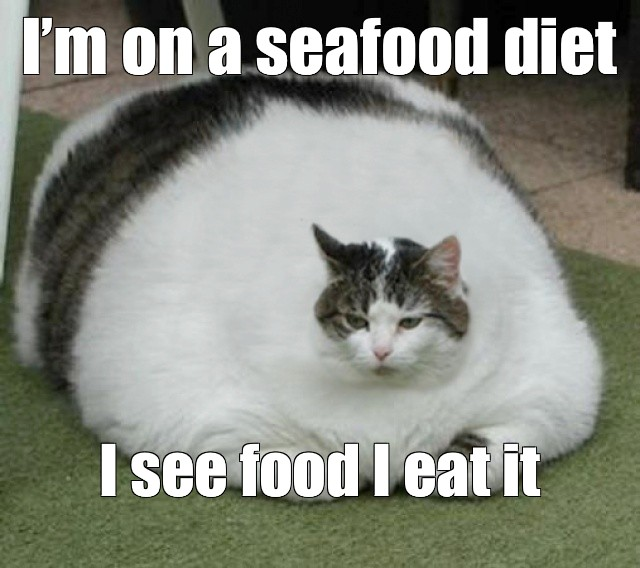

In [114]:
display(Image(filename='cat.jpg', width=500))

# 1. Data Loading and Initial Exploration

### 1.1 Import Libraries

In [115]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_classif
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from IPython.display import Image, display

In [116]:
custom_colors = ["#9AC9B6", "#F6F7E1", "#EBA05C", "#CB7843", "#7D4E3E"]
sns.set_style("whitegrid")
sns.set_palette(custom_colors)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

### 1.2 Load Dataset

In [117]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [118]:
df.tail()

Gender        Age    Height      Weight family_history_with_overweight  \
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O SCC       FAF       TUE  \
2106  yes   3.0  3.0  Sometimes    no  1.728139  no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130  no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193  no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339  no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513  no  1.026452  0.714137   

           CALC                 MTRANS        NObeyesdad  
2106  Sometimes  Public_Transportation  Obesity_Type_III  
2107  Sometimes  Public_Transportation  Obesity_Type_III  
2108  Sometimes  Public_Transportation  Obesity_Type_III  
2109  Sometimes  Public_Transportation  Obesity_Type_III  
2110  Sometimes  Public_Transportation  Obesity_Type_III

### 1.3 Initial Data Inspection

In [119]:
print("--- Data Info ---")
df.info()

print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF             

In [120]:
print("\n--- Descriptive Statistics ---")
df.describe()


--- Descriptive Statistics ---


Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

### 1.4 Column Renaming

In [121]:
column_mapping = {
    'family_history_with_overweight': 'FamilyHistory',
    'FAVC': 'HighCaloricFood',
    'FCVC': 'VegetableConsumption',
    'NCP': 'MainMeals',
    'CAEC': 'FoodBetweenMeals',
    'SMOKE': 'Smoke',
    'CH2O': 'WaterConsumption',
    'SCC': 'CalorieMonitoring',
    'FAF': 'PhysicalActivityFreq',
    'TUE': 'TechUseTime',
    'CALC': 'AlcoholConsumption',
    'MTRANS': 'Transportation',
    'NObeyesdad': 'ObesityLevel'
}

df.rename(columns=column_mapping, inplace=True)

print(df.columns)
df.head(2)

Index(['Gender', 'Age', 'Height', 'Weight', 'FamilyHistory', 'HighCaloricFood',
       'VegetableConsumption', 'MainMeals', 'FoodBetweenMeals', 'Smoke',
       'WaterConsumption', 'CalorieMonitoring', 'PhysicalActivityFreq',
       'TechUseTime', 'AlcoholConsumption', 'Transportation', 'ObesityLevel'],
      dtype='object')


Gender   Age  Height  Weight FamilyHistory HighCaloricFood  \
0  Female  21.0    1.62    64.0           yes              no   
1  Female  21.0    1.52    56.0           yes              no   

   VegetableConsumption  MainMeals FoodBetweenMeals Smoke  WaterConsumption  \
0                   2.0        3.0        Sometimes    no               2.0   
1                   3.0        3.0        Sometimes   yes               3.0   

  CalorieMonitoring  PhysicalActivityFreq  TechUseTime AlcoholConsumption  \
0                no                   0.0          1.0                 no   
1               yes                   3.0          0.0          Sometimes   

          Transportation   ObesityLevel  
0  Public_Transportation  Normal_Weight  
1  Public_Transportation  Normal_Weight

### 1.5 Observations from Initial Inspection

*   **Data Structure:** The dataset has 2,111 rows, 17 columns, and zero missing values.
*   **Duplicates:** There are 24 duplicate rows that must be removed.
*   **Data Types:** Since the data is synthetic, typically numbers appear as decimals and these should be transformed to integers.
*   **Target Variable:** Predicting the categorical `ObesityLevel` variable.

# 2. Deep Exploratory Data Analysis (EDA)


## 2.1 Data Integrity: Handling Duplicates

In [122]:
print(f"Original shape: {df.shape}")

df.drop_duplicates(inplace=True)

print(f"Shape after dropping duplicates: {df.shape}")

Original shape: (2111, 17)
Shape after dropping duplicates: (2087, 17)


## 2.2 Target Variable Analysis (`ObesityLevel`)

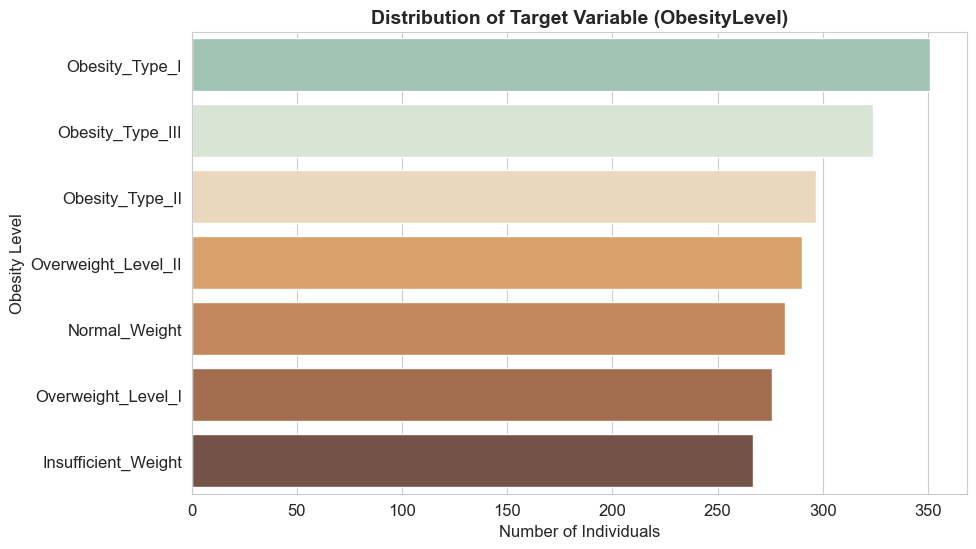

ObesityLevel
Obesity_Type_I         0.168184
Obesity_Type_III       0.155247
Obesity_Type_II        0.142310
Overweight_Level_II    0.138955
Normal_Weight          0.135122
Overweight_Level_I     0.132247
Insufficient_Weight    0.127935
Name: proportion, dtype: float64


In [123]:
plt.figure(figsize=(10, 6))
counts = df['ObesityLevel'].value_counts().sort_values(ascending=False)

dynamic_palette = sns.blend_palette(custom_colors, n_colors=len(counts))

sns.barplot(x=counts.values, y=counts.index, hue=counts.index, palette=dynamic_palette, legend=False)
plt.title('Distribution of Target Variable (ObesityLevel)')
plt.xlabel('Number of Individuals')
plt.ylabel('Obesity Level')

plt.show()

print(df['ObesityLevel'].value_counts(normalize=True))

## 2.3 Numerical Feature Distributions

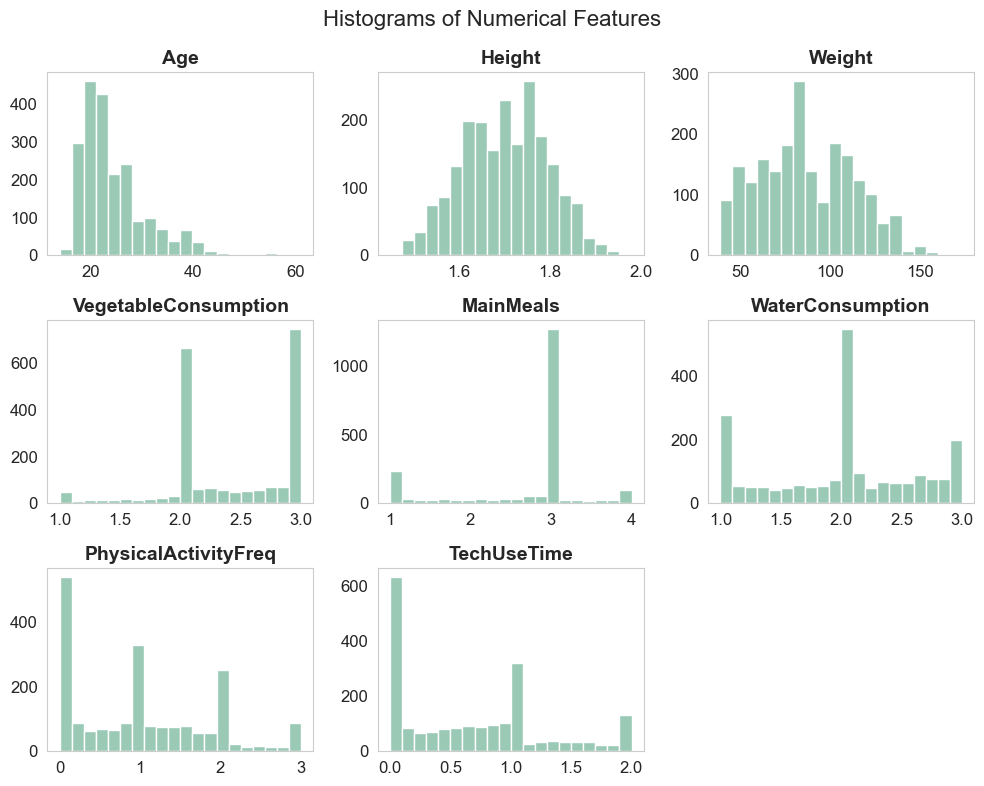

In [124]:
num_cols = ['Age', 'Height', 'Weight', 'VegetableConsumption', 'MainMeals', 'WaterConsumption', 'PhysicalActivityFreq', 'TechUseTime']

df[num_cols].hist(bins=20, figsize=(10, 8), layout=(3, 3), color=custom_colors[0], grid=False)
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

## 2.4 Outlier Analysis (Boxplots)

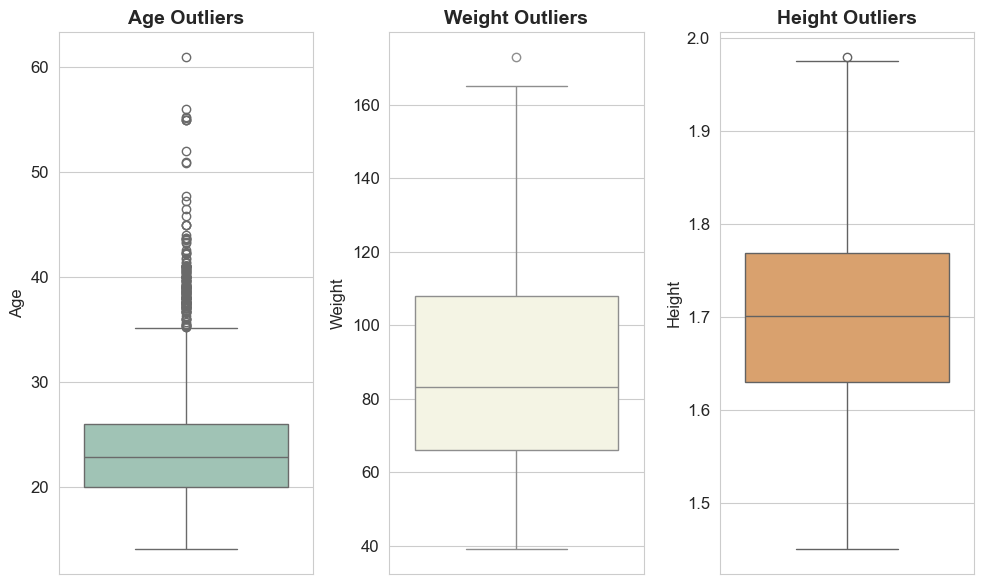

In [125]:
fig, axes = plt.subplots(1, 3, figsize=(10, 6))

sns.boxplot(y='Age', data=df, ax=axes[0], color=custom_colors[0])
axes[0].set_title('Age Outliers')

sns.boxplot(y='Weight', data=df, ax=axes[1], color=custom_colors[1])
axes[1].set_title('Weight Outliers')

sns.boxplot(y='Height', data=df, ax=axes[2], color=custom_colors[2])
axes[2].set_title('Height Outliers')

plt.tight_layout()
plt.show()

## 2.5 Categorical Feature Analysis

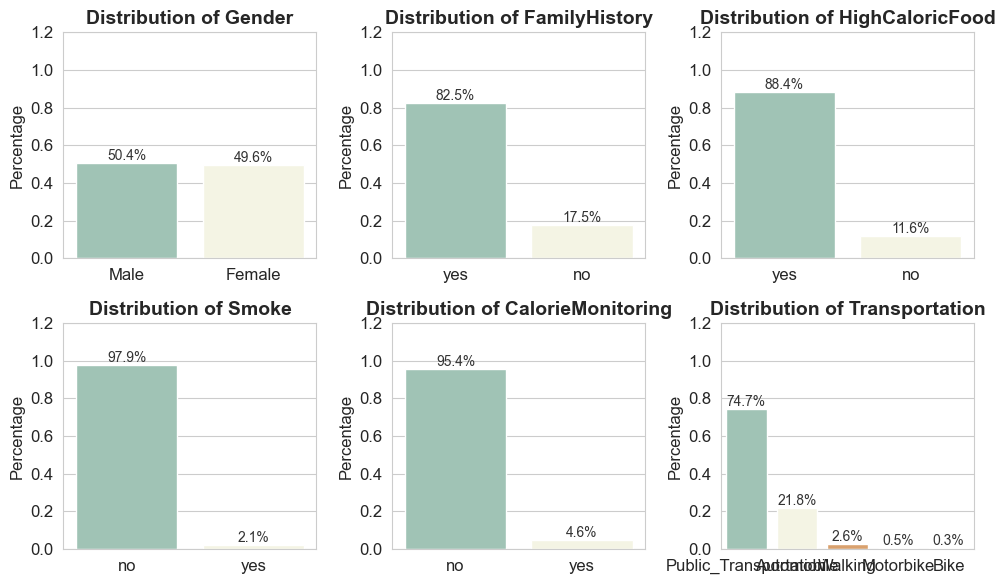

In [126]:
cat_cols = ['Gender', 'FamilyHistory', 'HighCaloricFood', 'Smoke', 'CalorieMonitoring', 'Transportation']

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    counts = df[col].value_counts(normalize=True)
    
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i], hue=counts.index, palette=custom_colors, legend=False)
    
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Percentage')
    axes[i].set_xlabel('')
    axes[i].set_ylim(0, 1.2)
    
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()*100:.1f}%', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='bottom', fontsize=10, color='#333333')

plt.tight_layout()
plt.show()

## 2.6 Ordinal Categorical Analysis

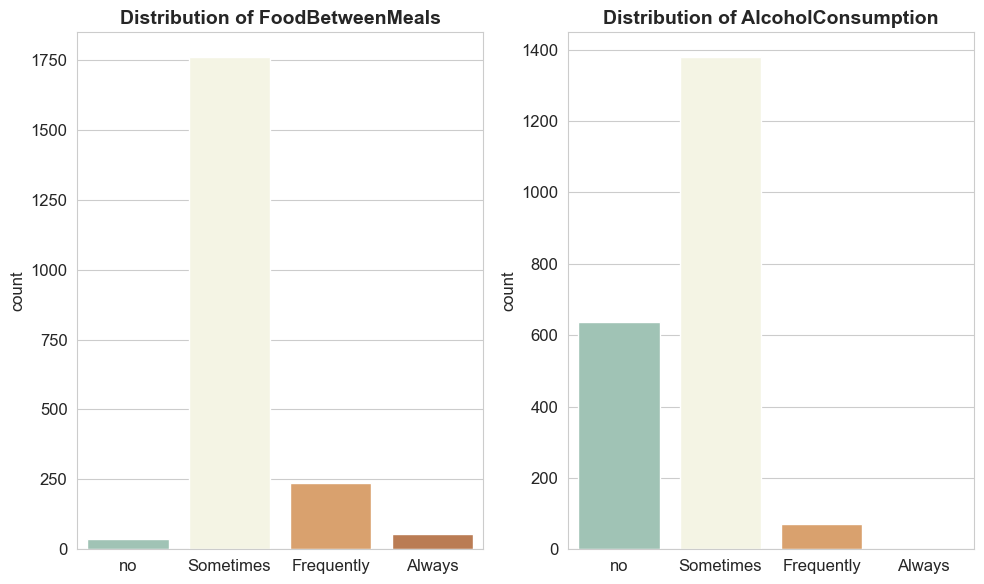

In [127]:
ordinal_cols = ['FoodBetweenMeals', 'AlcoholConsumption']
order_list = ['no', 'Sometimes', 'Frequently', 'Always']

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

for i, col in enumerate(ordinal_cols):
    sns.countplot(x=col, data=df, order=order_list, ax=axes[i], palette=custom_colors)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

# 3. Bivariate Analysis

## 3.1 Categorical Lifestyle Factors vs. Obesity

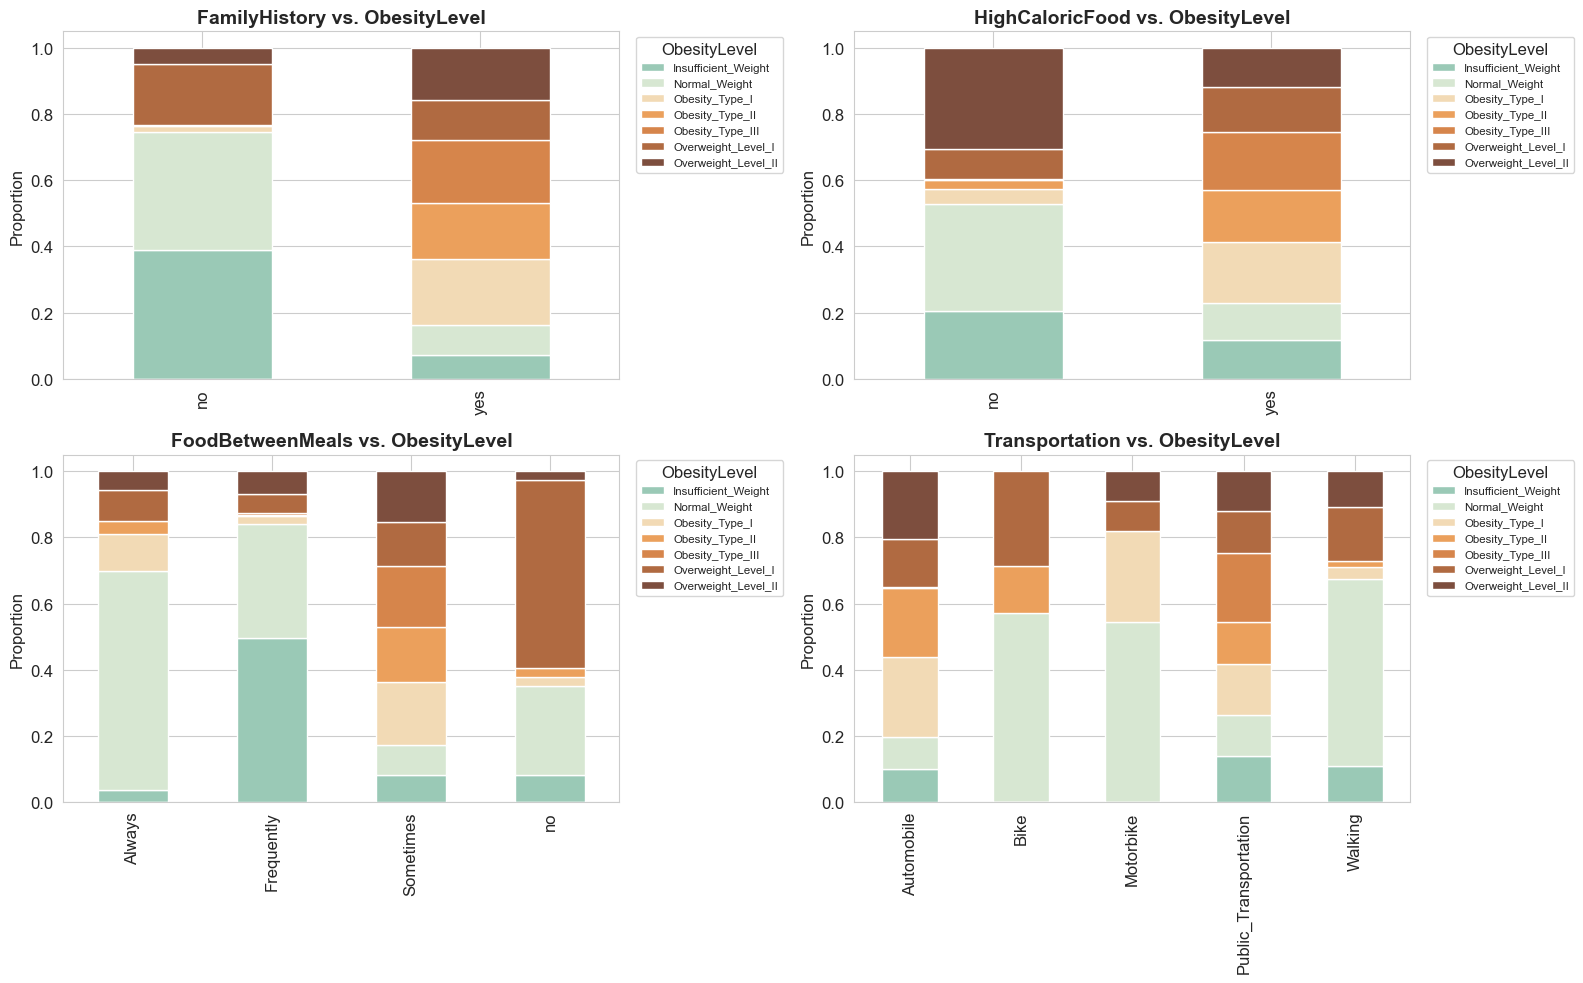

In [128]:
categorical_features = ['FamilyHistory', 'HighCaloricFood', 'FoodBetweenMeals', 'Transportation']
target = 'ObesityLevel'

n_targets = df[target].nunique()
target_palette = sns.blend_palette(custom_colors, n_colors=n_targets)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = axes.flatten() 

for i, col in enumerate(categorical_features):
    props = df.groupby(col)[target].value_counts(normalize=True).unstack()

    props.plot(kind='bar', stacked=True, color=target_palette, ax=axes[i], edgecolor='white')

    axes[i].set_title(f'{col} vs. {target}')
    axes[i].set_ylabel('Proportion')
    axes[i].set_xlabel('')

    axes[i].legend(title=target, bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='x-small')

plt.tight_layout()
plt.show()

## 3.2 Numerical Habits vs. Obesity

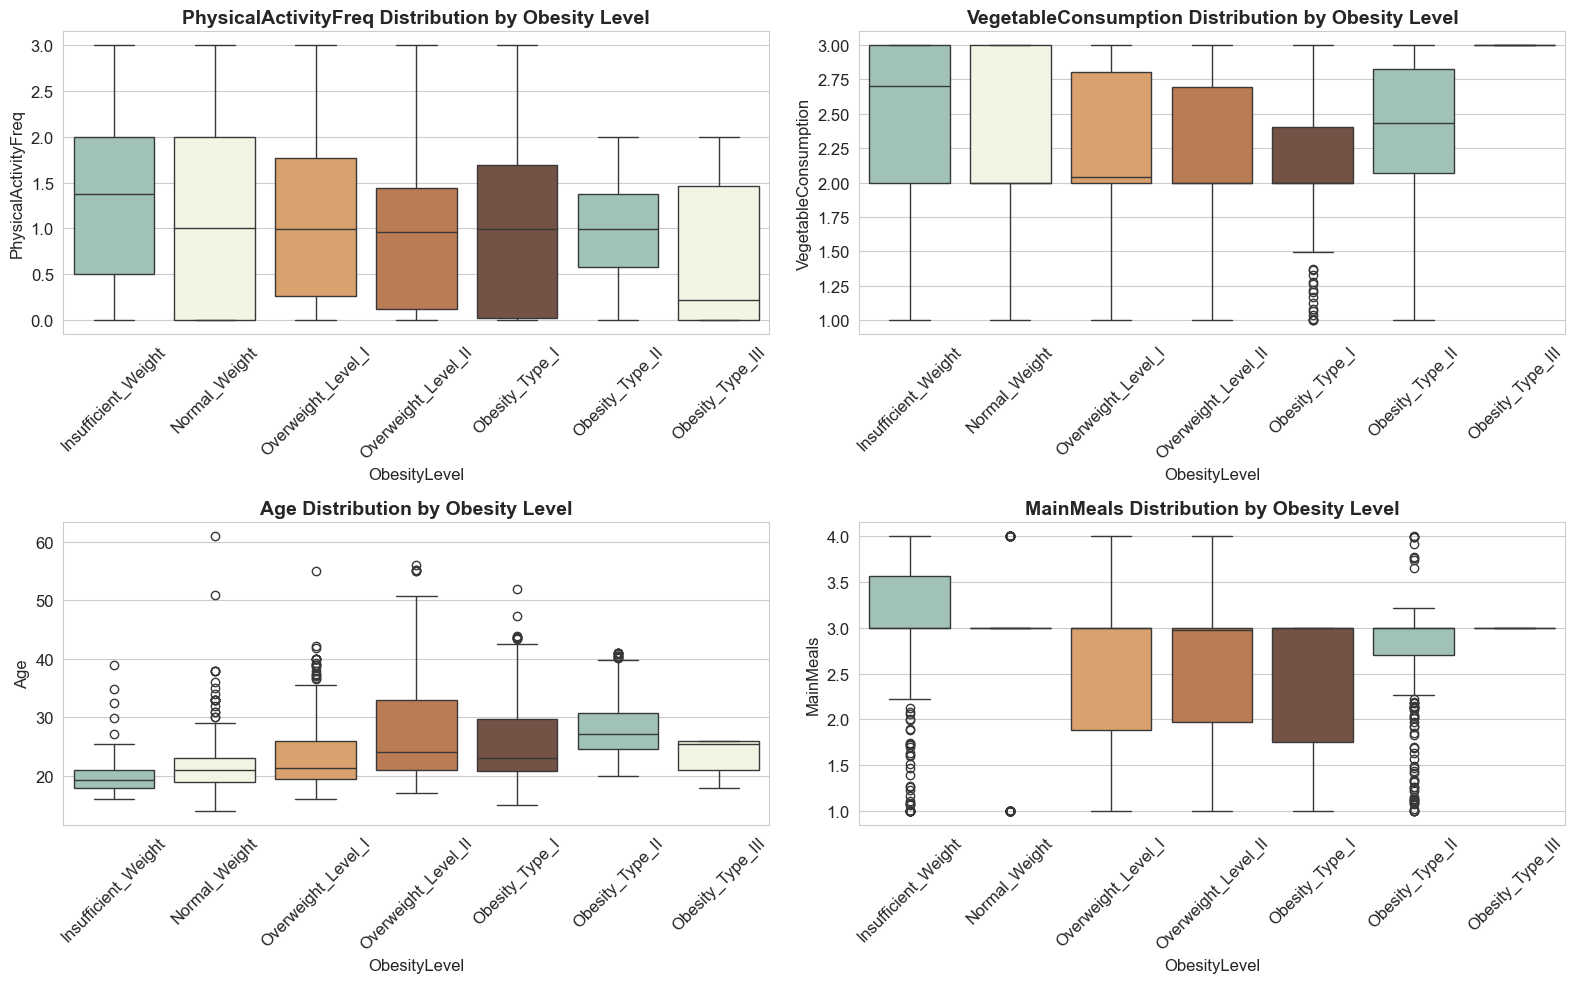

In [129]:
obesity_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 
                 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

num_features = ['PhysicalActivityFreq', 'VegetableConsumption', 'Age', 'MainMeals']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.boxplot(x='ObesityLevel', y=col, data=df, order=obesity_order, ax=axes[i], palette=custom_colors)
    axes[i].set_title(f'{col} Distribution by Obesity Level')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3.3 Correlation Matrix (Heat Map)

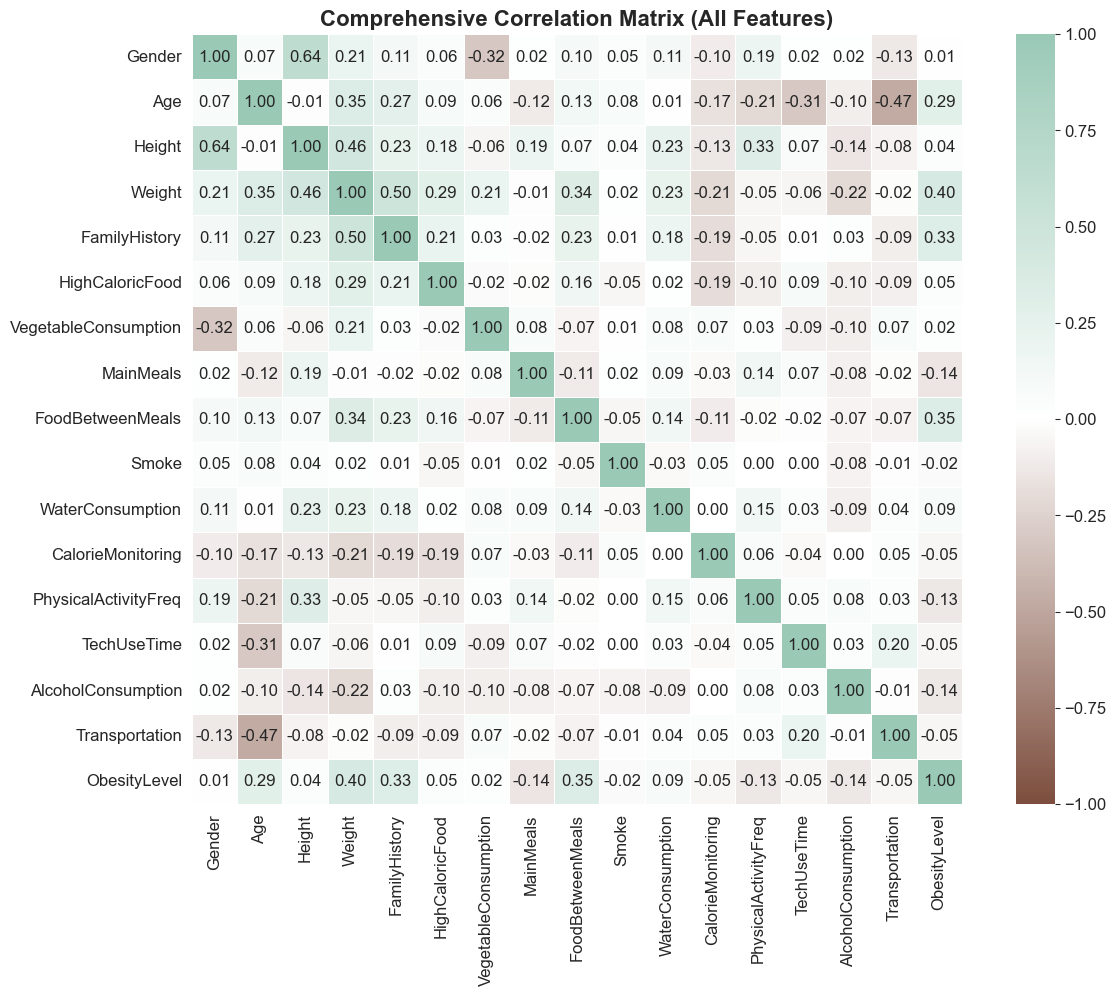

In [130]:
if 'custom_colors' not in locals():
    custom_colors = ["#8FBC8F", "#F4A460", "#CD853F", "#A0522D", "#8B4513"]

df_corr = df.copy()
le = LabelEncoder()

for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = le.fit_transform(df_corr[col])

earthy_diverging = sns.blend_palette([custom_colors[4], "#FFFFFF", custom_colors[0]], as_cmap=True)

plt.figure(figsize=(14, 10))

sns.heatmap(df_corr.corr(method='spearman'), 
            annot=True, 
            fmt='.2f', 
            cmap=earthy_diverging, 
            center=0,
            vmin=-1, vmax=1,
            linewidths=0.5, 
            linecolor='white',
            square=True)

plt.title('Comprehensive Correlation Matrix (All Features)', fontsize=16)
plt.show()

## 3.4 Pairwise Feature Relationships

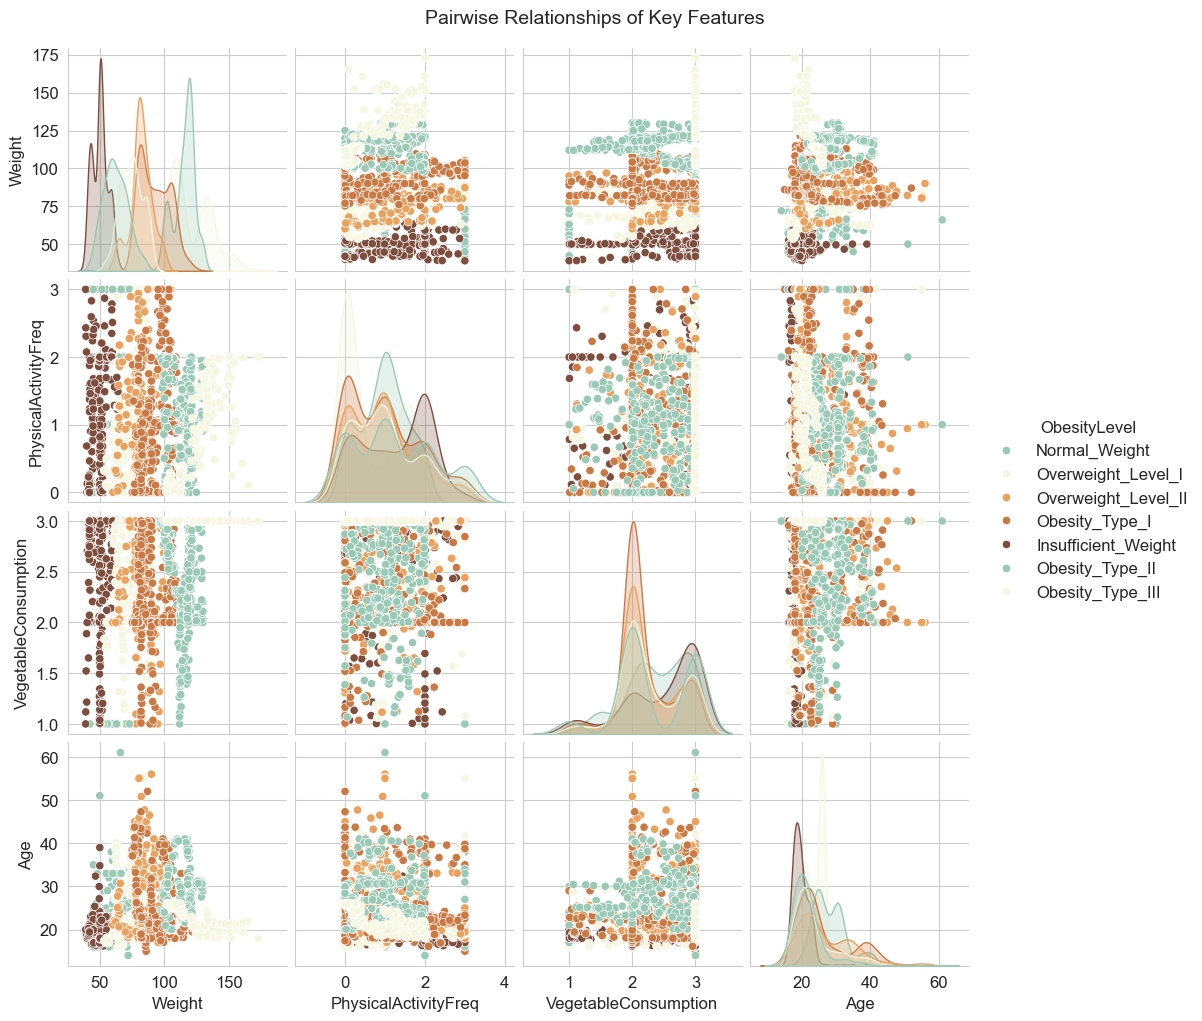

In [131]:
selected_features = ['Weight', 'PhysicalActivityFreq', 'VegetableConsumption', 'Age', 'ObesityLevel']

sns.pairplot(df[selected_features], hue='ObesityLevel', palette=custom_colors )
plt.suptitle('Pairwise Relationships of Key Features', y=1.02, fontsize=14)
plt.show()

## 3.5 Segmentation Analysis: Age Groups

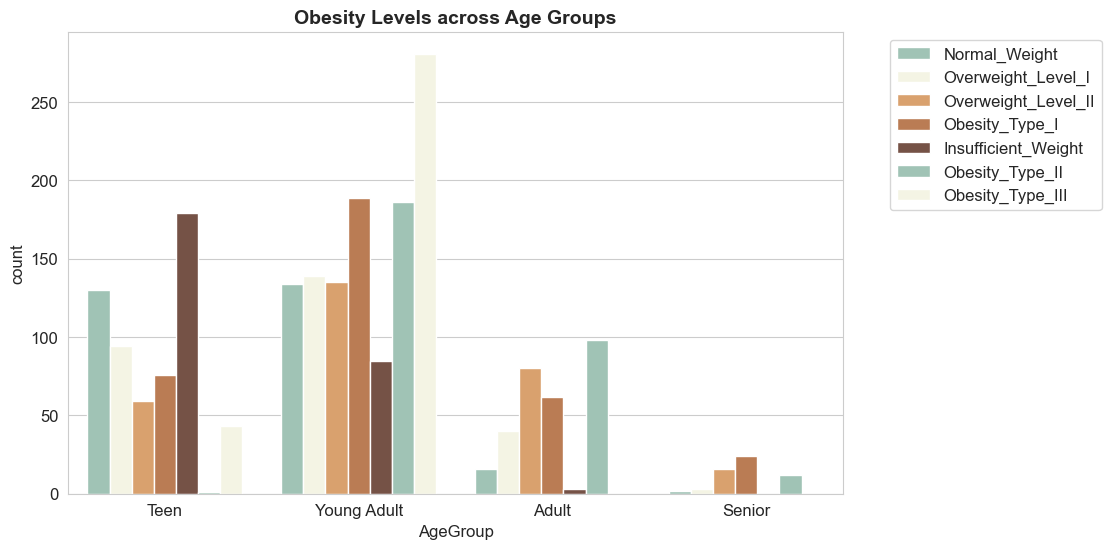

In [132]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 100], labels=['Teen', 'Young Adult', 'Adult', 'Senior'])

plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='ObesityLevel', data=df, palette=custom_colors)
plt.title('Obesity Levels across Age Groups', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

df.drop(columns=['AgeGroup'], inplace=True)

## 3.6 Non-Linear Feature Utility (Mutual Information)

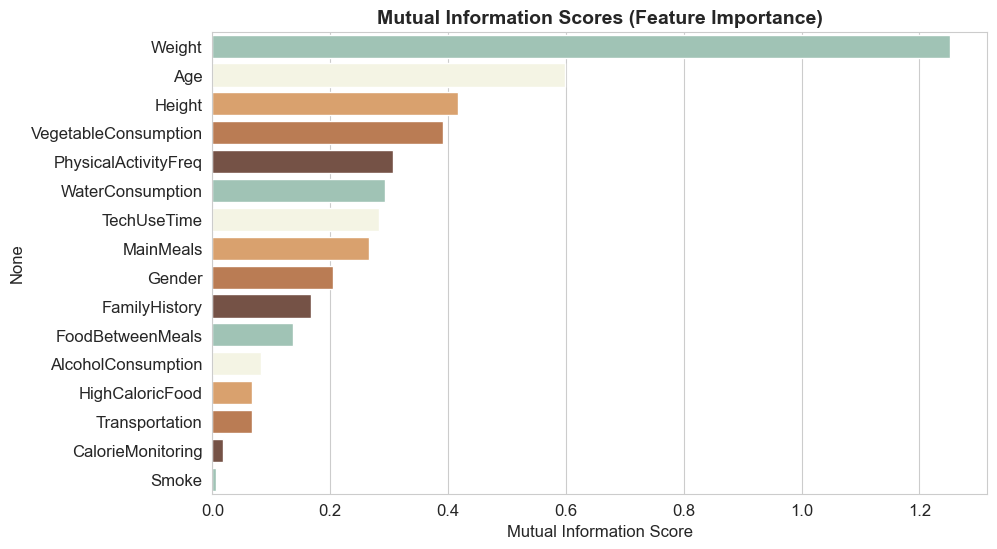

In [133]:
X_mi = df.drop(columns=['ObesityLevel'])
y_mi = df['ObesityLevel']

for col in X_mi.select_dtypes(include='object').columns:
    X_mi[col] = X_mi[col].astype('category').cat.codes

mi_scores = mutual_info_classif(X_mi, y_mi, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi_scores, index=X_mi.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=mi_series.values, y=mi_series.index, palette=custom_colors)
plt.title('Mutual Information Scores (Feature Importance)', fontsize=14)
plt.xlabel('Mutual Information Score')
plt.show()

## 3.7 Visualizing Class Separability (PCA & t-SNE)

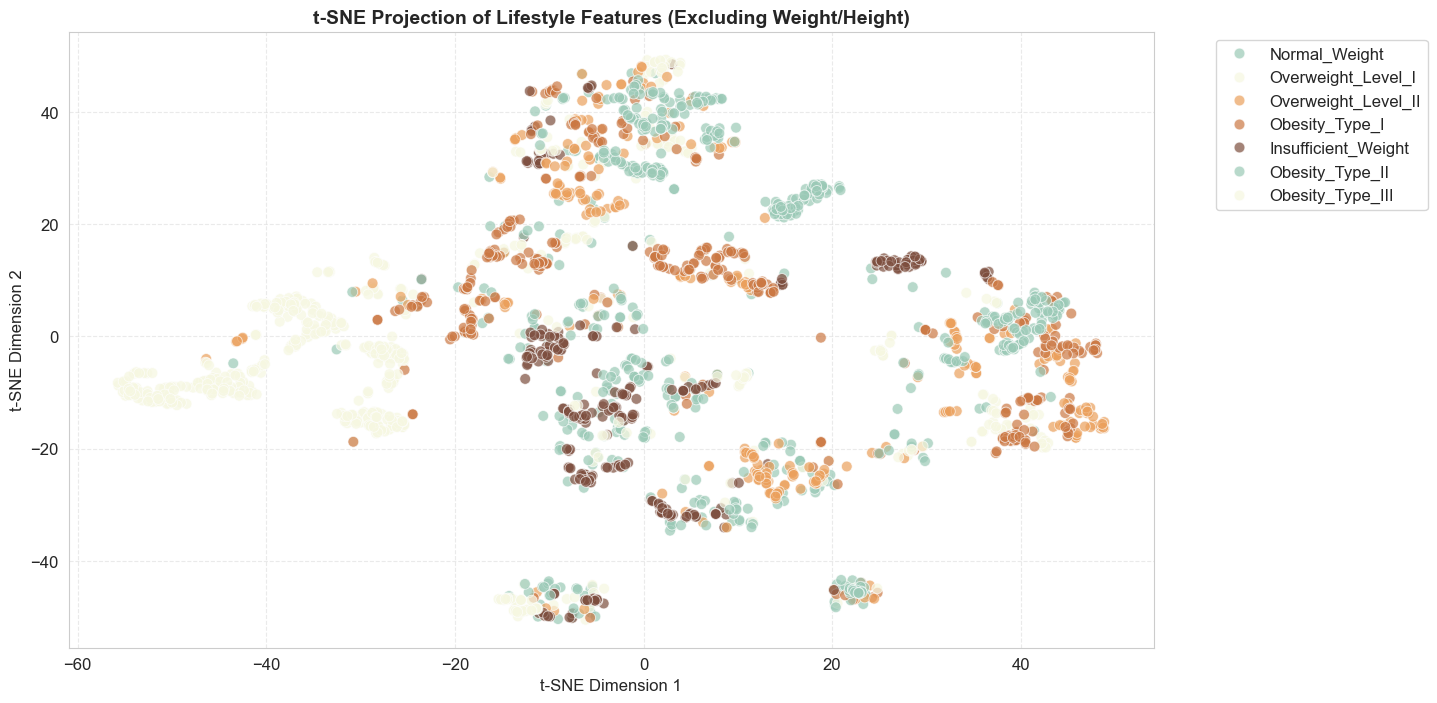

In [134]:
features_for_tsne = df.drop(columns=['ObesityLevel', 'Weight', 'Height'])

for col in features_for_tsne.select_dtypes(include='object').columns:
    features_for_tsne[col] = features_for_tsne[col].astype('category').cat.codes

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_for_tsne)

tsne = TSNE(n_components=2, random_state=42, perplexity=40)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(14, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['ObesityLevel'], palette=custom_colors, alpha=0.7, s=60)
plt.title('t-SNE Projection of Lifestyle Features (Excluding Weight/Height)', fontsize=14)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

## 3.8 Lifestyle Clustering

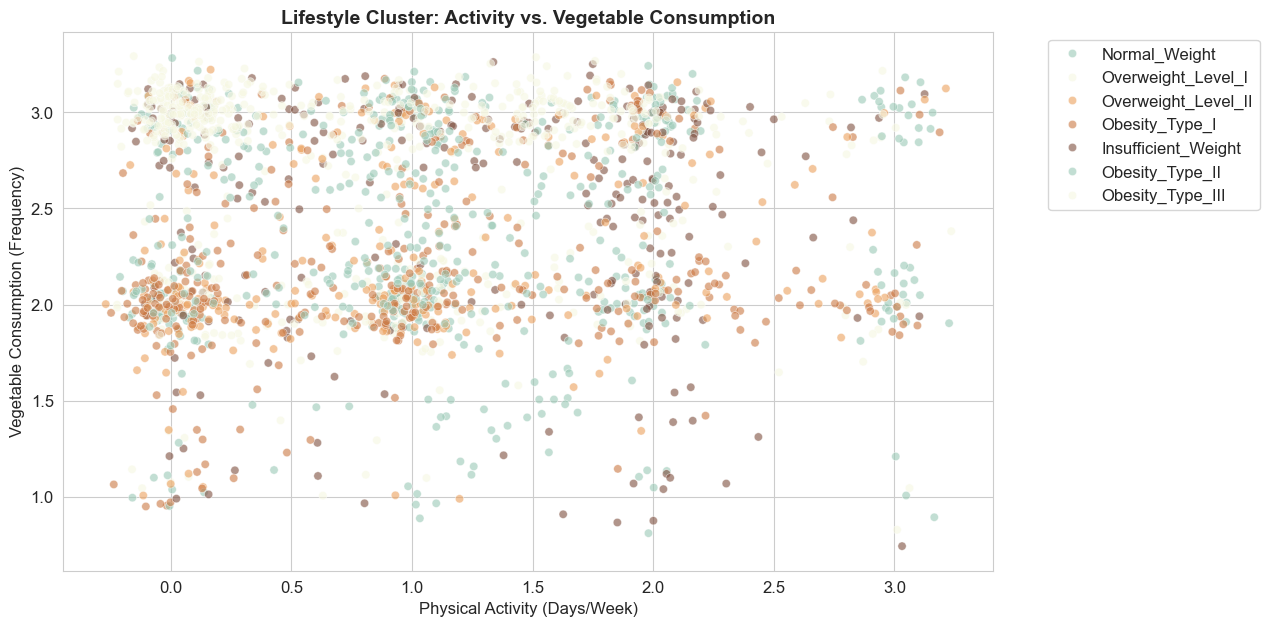

In [135]:
plt.figure(figsize=(12, 7))

jitter_x = df['PhysicalActivityFreq'] + np.random.normal(0, 0.1, size=len(df))
jitter_y = df['VegetableConsumption'] + np.random.normal(0, 0.1, size=len(df))

sns.scatterplot(x=jitter_x, y=jitter_y, hue=df['ObesityLevel'], palette=custom_colors, alpha=0.6)
plt.title('Lifestyle Cluster: Activity vs. Vegetable Consumption', fontsize=14)
plt.xlabel('Physical Activity (Days/Week)')
plt.ylabel('Vegetable Consumption (Frequency)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 4. Preprocessing & Feature Engineering

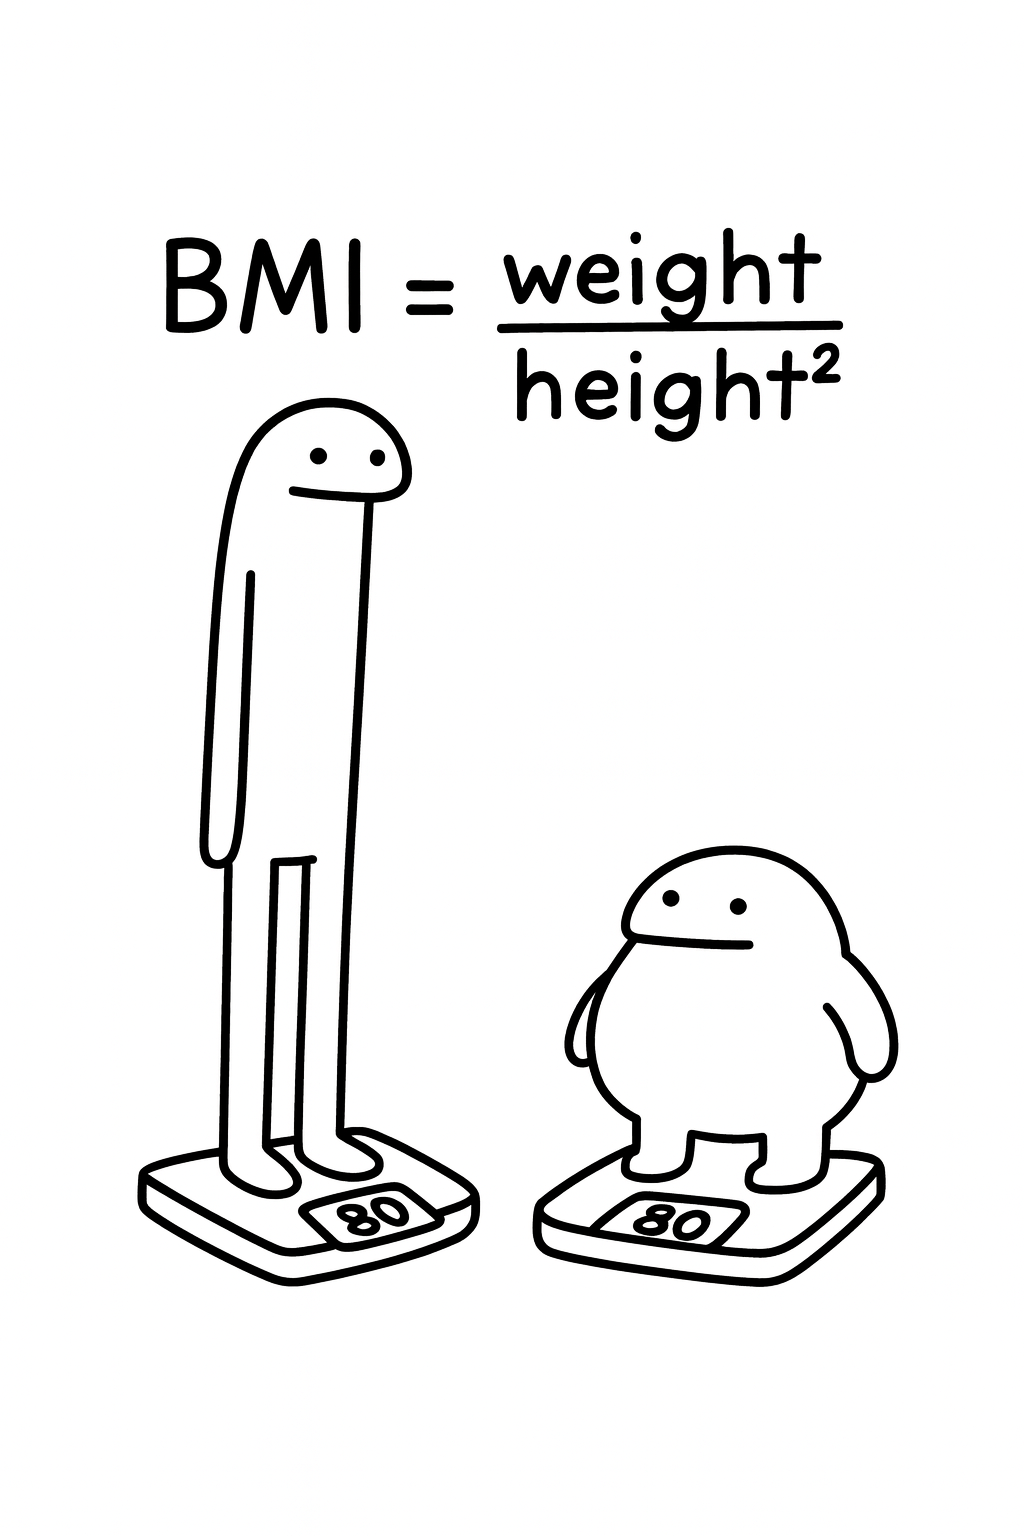

In [136]:
display(Image(filename='bmi_meme.png', width=500))

Columns remaining: ['Gender', 'Age', 'FamilyHistory', 'HighCaloricFood', 'VegetableConsumption', 'MainMeals', 'FoodBetweenMeals', 'Smoke', 'WaterConsumption', 'CalorieMonitoring', 'PhysicalActivityFreq', 'TechUseTime', 'AlcoholConsumption', 'Transportation', 'ObesityLevel']


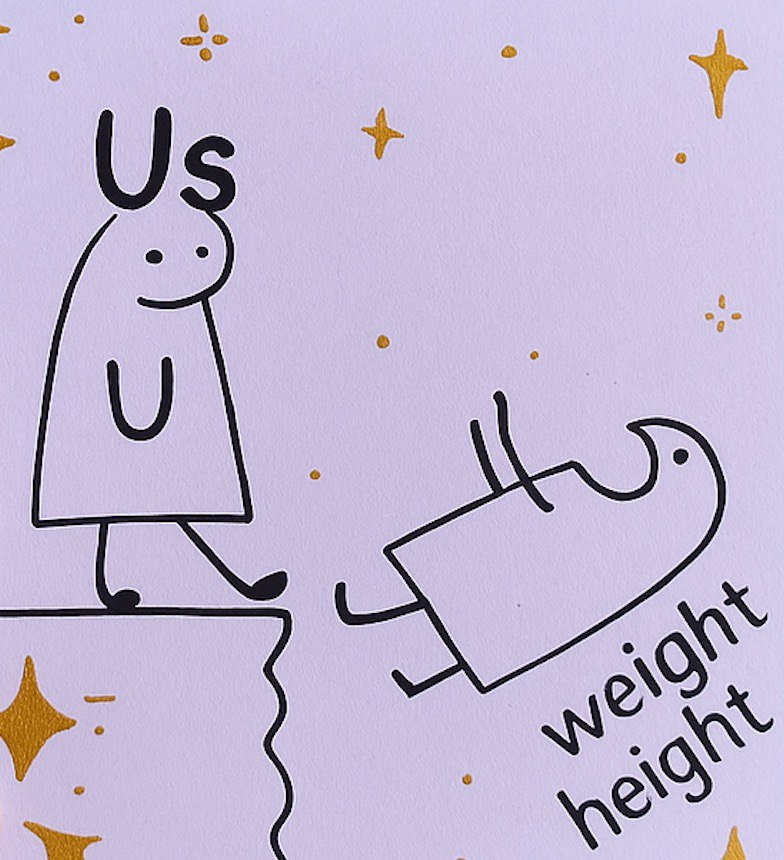

In [137]:
df_clean = df.drop(columns=['Weight', 'Height'])
print(f"Columns remaining: {df_clean.columns.tolist()}")

display(Image(filename='drop_meme.png', width=500))

## 4.2 Cleaning Synthetic Data Artifacts

In [138]:
def clean_synthetic_features(data):
    df_out = data.copy()
    
    integer_cols = ['VegetableConsumption', 'MainMeals', 'WaterConsumption', 'PhysicalActivityFreq', 'TechUseTime']
    
    for col in integer_cols:
        df_out[col] = df_out[col].round().astype(int)
        
    return df_out

df_clean = clean_synthetic_features(df_clean)
df_clean.head()

Gender   Age FamilyHistory HighCaloricFood  VegetableConsumption  \
0  Female  21.0           yes              no                     2   
1  Female  21.0           yes              no                     3   
2    Male  23.0           yes              no                     2   
3    Male  27.0            no              no                     3   
4    Male  22.0            no              no                     2   

   MainMeals FoodBetweenMeals Smoke  WaterConsumption CalorieMonitoring  \
0          3        Sometimes    no                 2                no   
1          3        Sometimes   yes                 3               yes   
2          3        Sometimes    no                 2                no   
3          3        Sometimes    no                 2                no   
4          1        Sometimes    no                 2                no   

   PhysicalActivityFreq  TechUseTime AlcoholConsumption  \
0                     0            1                 no   
1                     3            0          Sometimes   
2                     2            1         Frequently   
3                     2            0         Frequently   
4                     0            0          Sometimes   

          Transportation         ObesityLevel  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

## 4.3 Feature Engineering

1.  **`ActivityBalance`**: Net physical activity derived from **`PhysicalActivityFreq`** minus **`TechUseTime`**.
2.  **`DietScore`**: Nutrition metric calculated by subtracting unhealthy intake (**`FoodBetweenMeals`**, **`HighCaloricFood`**) from healthy habits (**`VegetableConsumption`**, **`WaterConsumption`**).
3.  **`HealthyHabitScore`**: General lifestyle score contrasting positive inputs (**`VegetableConsumption`**, **`WaterConsumption`**) against negative habits (**`AlcoholConsumption`**, **`Smoke`**).

In [139]:
def engineer_features(data):
    df_eng = data.copy()

    df_eng['ActivityBalance'] = df_eng['PhysicalActivityFreq'] - df_eng['TechUseTime']
  
    caec_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
    favc_map = {'no': 0, 'yes': 1}
    
    df_eng['DietScore'] = (df_eng['VegetableConsumption'] + df_eng['WaterConsumption']) - \
                          (df_eng['FoodBetweenMeals'].map(caec_map) + df_eng['HighCaloricFood'].map(favc_map))
    
    calc_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
    alcohol_score = df_eng['AlcoholConsumption'].map(calc_map)
    smoke_score = df_eng['Smoke'].apply(lambda x: 1 if x == 'yes' else 0)
    
    df_eng['HealthyHabitScore'] = (df_eng['VegetableConsumption'] + df_eng['WaterConsumption']) - (alcohol_score + smoke_score)
    
    return df_eng

df_engineered = engineer_features(df_clean)

df_engineered[['ActivityBalance', 'DietScore', 'HealthyHabitScore']].head()

ActivityBalance  DietScore  HealthyHabitScore
0               -1          3                  4
1                3          5                  4
2                1          3                  2
3                2          4                  3
4                0          3                  3

## 4.4 Data Splitting and Target Encoding

In [140]:
target_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

df_engineered['ObesityLevel_Encoded'] = df_engineered['ObesityLevel'].map(target_mapping)

X = df_engineered.drop(columns=['ObesityLevel', 'ObesityLevel_Encoded'])
y = df_engineered['ObesityLevel_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")

Training Data Shape: (1669, 17)
Test Data Shape: (418, 17)


## 4.5 The Preprocessing Pipeline
*   **DietScore, ActivityBalance, HealthyHabitScore**: Treated as numerical features and scaled.
*   **Categorical Features**: One-Hot Encoded.
*   **Ordinal Features**: Ordinal Encoded.

In [141]:
numerical_cols = ['Age', 'VegetableConsumption', 'MainMeals', 'WaterConsumption', 
                  'PhysicalActivityFreq', 'TechUseTime', 
                  'ActivityBalance', 'DietScore', 'HealthyHabitScore']

ordinal_cols = ['FoodBetweenMeals', 'AlcoholConsumption']
ordinal_order = [
    ['no', 'Sometimes', 'Frequently', 'Always'],
    ['no', 'Sometimes', 'Frequently', 'Always']
]

nominal_cols = ['Gender', 'FamilyHistory', 'HighCaloricFood', 'Smoke', 'CalorieMonitoring', 'Transportation']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('ord', OrdinalEncoder(categories=ordinal_order), ordinal_cols),
        ('nom', OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_cols)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Processed Training Shape: {X_train_processed.shape}")

Processed Training Shape: (1669, 20)


# 5. Model Experimentation



## 5.1 Evaluation Metrics

In [142]:
if 'custom_colors' not in locals():
    custom_colors = ["#8FBC8F", "#F4A460", "#CD853F", "#A0522D", "#8B4513"]

def get_feature_names(preprocessor):
    try:
        raw = preprocessor.get_feature_names_out()
    except:
        raw = preprocessor.get_feature_names()
    
    return [n.split("__")[1] if "__" in n else n for n in raw]

feature_names = get_feature_names(preprocessor)

def evaluate_and_visualize(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    print(f"--- {model_name} Results ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Macro F1-Score: {f1:.4f}")
    print("\nClassification Report:\n")
    
    try:
        labels = list(target_mapping.keys())
    except NameError:
        labels = np.unique(y_test)
        
    print(classification_report(y_test, y_pred, target_names=[str(l) for l in labels]))
    
    has_importance = hasattr(model, 'feature_importances_') or hasattr(model, 'coef_')
    fig_cols = 2 if has_importance else 1
    
    fig, axes = plt.subplots(1, fig_cols, figsize=(16 if fig_cols==2 else 8, 6))
    if fig_cols == 1: axes = [axes]
    
    cm = confusion_matrix(y_test, y_pred)

    green_monochrome = sns.blend_palette(["#FFFFFF", custom_colors[0], "#2F4F4F"], as_cmap=True)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap=green_monochrome, ax=axes[0],
                xticklabels=labels, yticklabels=labels,
                linewidths=0.5, linecolor='white') 
                
    axes[0].set_title(f'{model_name} Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')
    axes[0].tick_params(axis='x', rotation=45)
    
    if fig_cols == 2:
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
        elif hasattr(model, 'coef_'):
            importances = np.mean(np.abs(model.coef_), axis=0)
            
        if len(feature_names) == len(importances):
            feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
            feat_df = feat_df.sort_values(by='Importance', ascending=False).head(20)
            
            green_to_brown = sns.blend_palette([custom_colors[0], "#E0D6B6", custom_colors[4]], n_colors=len(feat_df))
            
            sns.barplot(x='Importance', y='Feature', data=feat_df, ax=axes[1], palette=green_to_brown)
            
            axes[1].set_title(f'{model_name} Feature Importance')
            axes[1].set_xlabel('Relative Importance')
            axes[1].set_ylabel('')
        else:
            axes[1].text(0.5, 0.5, "Feature Mismatch", ha='center')
        
    plt.tight_layout()
    plt.show()
    
    return model, y_pred

## 5.2 Baseline Model: Logistic Regression

--- Logistic Regression Results ---
Accuracy: 0.5766
Macro F1-Score: 0.5475

Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.56      0.58      0.57        53
      Normal_Weight       0.58      0.39      0.46        57
 Overweight_Level_I       0.53      0.35      0.42        55
Overweight_Level_II       0.39      0.19      0.26        58
     Obesity_Type_I       0.46      0.64      0.54        70
    Obesity_Type_II       0.53      0.83      0.65        60
   Obesity_Type_III       0.90      0.97      0.93        65

           accuracy                           0.58       418
          macro avg       0.57      0.56      0.55       418
       weighted avg       0.57      0.58      0.55       418



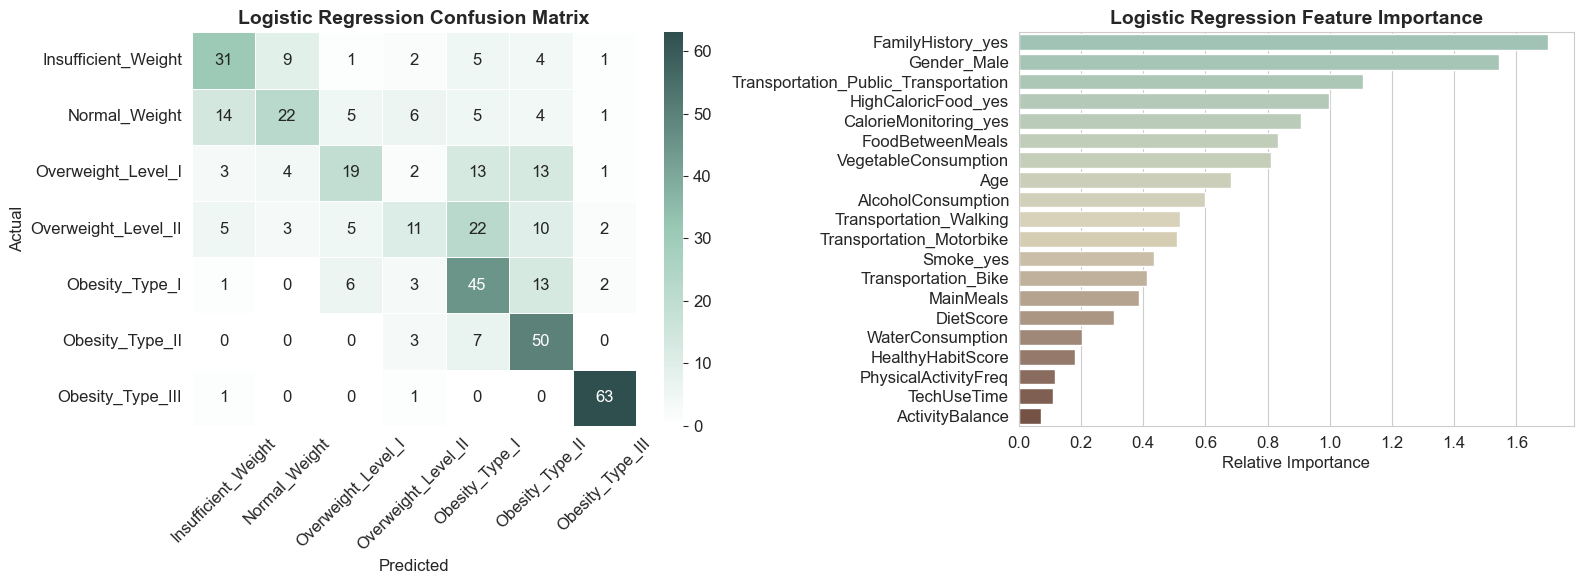

In [143]:
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
lr_model, lr_pred = evaluate_and_visualize(lr_model, X_train_processed, y_train, X_test_processed, y_test, "Logistic Regression")

## 5.3 Non-Linear Model: Decision Tree

--- Decision Tree Results ---
Accuracy: 0.6818
Macro F1-Score: 0.6702

Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.73      0.77      0.75        53
      Normal_Weight       0.49      0.40      0.44        57
 Overweight_Level_I       0.58      0.60      0.59        55
Overweight_Level_II       0.53      0.47      0.50        58
     Obesity_Type_I       0.65      0.60      0.62        70
    Obesity_Type_II       0.71      0.93      0.81        60
   Obesity_Type_III       1.00      0.97      0.98        65

           accuracy                           0.68       418
          macro avg       0.67      0.68      0.67       418
       weighted avg       0.67      0.68      0.67       418



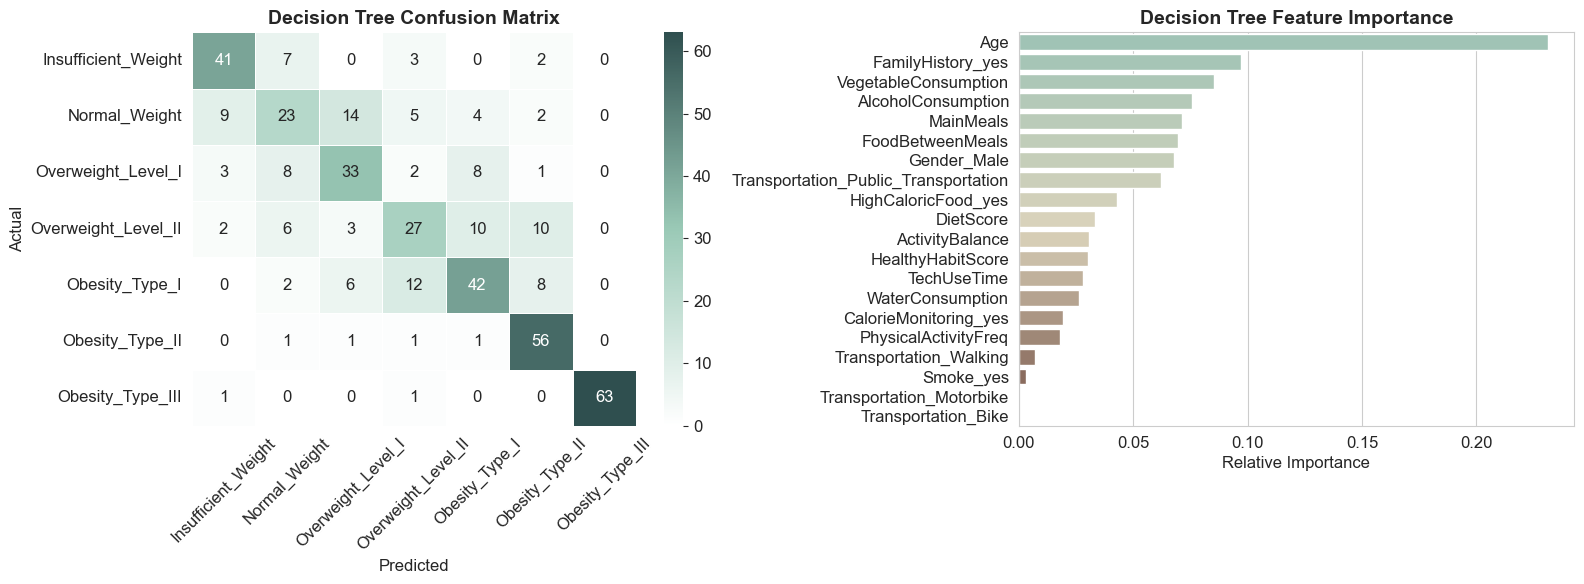

In [144]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)

dt_model, dt_pred = evaluate_and_visualize(dt_model, X_train_processed, y_train, X_test_processed, y_test, "Decision Tree")

## 5.4 Ensemble Model: Random Forest

--- Random Forest Results ---
Accuracy: 0.7679
Macro F1-Score: 0.7607

Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.76      0.89      0.82        53
      Normal_Weight       0.65      0.58      0.61        57
 Overweight_Level_I       0.67      0.71      0.69        55
Overweight_Level_II       0.64      0.55      0.59        58
     Obesity_Type_I       0.75      0.76      0.75        70
    Obesity_Type_II       0.87      0.90      0.89        60
   Obesity_Type_III       0.98      0.97      0.98        65

           accuracy                           0.77       418
          macro avg       0.76      0.76      0.76       418
       weighted avg       0.76      0.77      0.76       418



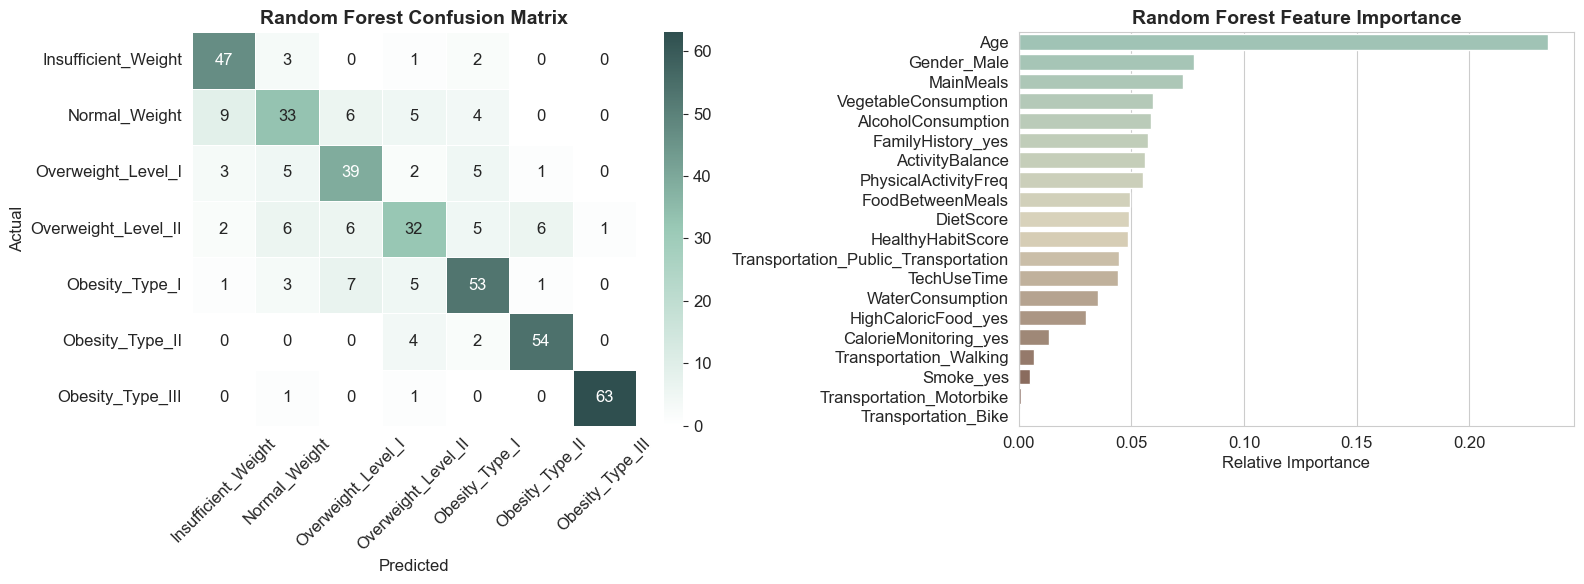

In [145]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_model, rf_pred = evaluate_and_visualize(rf_model, X_train_processed, y_train, X_test_processed, y_test, "Random Forest")

## 5.5 Expanding the Model Space: SVC and K-NN

--- SVC (RBF) Results ---
Accuracy: 0.7321
Macro F1-Score: 0.7247

Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.76      0.79      0.78        53
      Normal_Weight       0.62      0.61      0.62        57
 Overweight_Level_I       0.67      0.58      0.62        55
Overweight_Level_II       0.58      0.52      0.55        58
     Obesity_Type_I       0.66      0.69      0.67        70
    Obesity_Type_II       0.81      0.93      0.87        60
   Obesity_Type_III       0.97      0.97      0.97        65

           accuracy                           0.73       418
          macro avg       0.72      0.73      0.72       418
       weighted avg       0.73      0.73      0.73       418



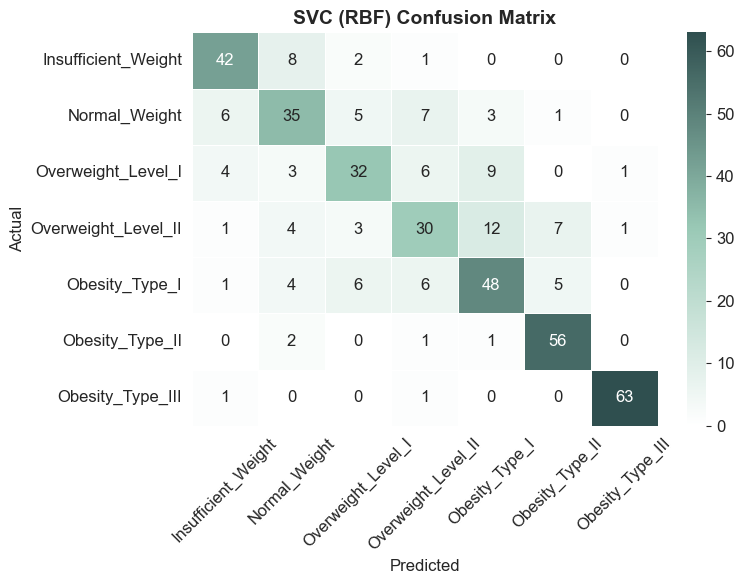

--- KNN Results ---
Accuracy: 0.6411
Macro F1-Score: 0.6166

Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.61      0.70      0.65        53
      Normal_Weight       0.65      0.23      0.34        57
 Overweight_Level_I       0.42      0.49      0.45        55
Overweight_Level_II       0.63      0.55      0.59        58
     Obesity_Type_I       0.59      0.60      0.60        70
    Obesity_Type_II       0.72      0.88      0.79        60
   Obesity_Type_III       0.83      0.98      0.90        65

           accuracy                           0.64       418
          macro avg       0.63      0.63      0.62       418
       weighted avg       0.64      0.64      0.62       418



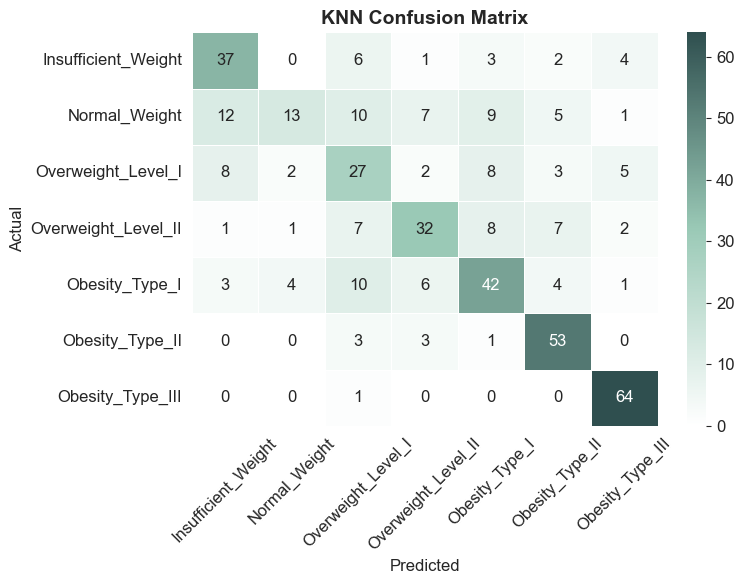

In [146]:
svc_model = SVC(kernel='rbf', C=1.0, random_state=42)
svc_model, svc_pred = evaluate_and_visualize(svc_model, X_train_processed, y_train, X_test_processed, y_test, "SVC (RBF)")

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model, knn_pred = evaluate_and_visualize(knn_model, X_train_processed, y_train, X_test_processed, y_test, "KNN")

## 5.6 Model Optimization

Tuning Random Forest... This may take 1-2 minutes.
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters found: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
--- Tuned Random Forest Results ---
Accuracy: 0.7895
Macro F1-Score: 0.7850

Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.89      0.87        53
      Normal_Weight       0.65      0.68      0.67        57
 Overweight_Level_I       0.68      0.73      0.70        55
Overweight_Level_II       0.68      0.59      0.63        58
     Obesity_Type_I       0.82      0.76      0.79        70
    Obesity_Type_II       0.82      0.90      0.86        60
   Obesity_Type_III       1.00      0.97      0.98        65

           accuracy                           0.79       418
          macro avg       0.79      0.79      0.79       418
       weighted avg       0.79      0.79     

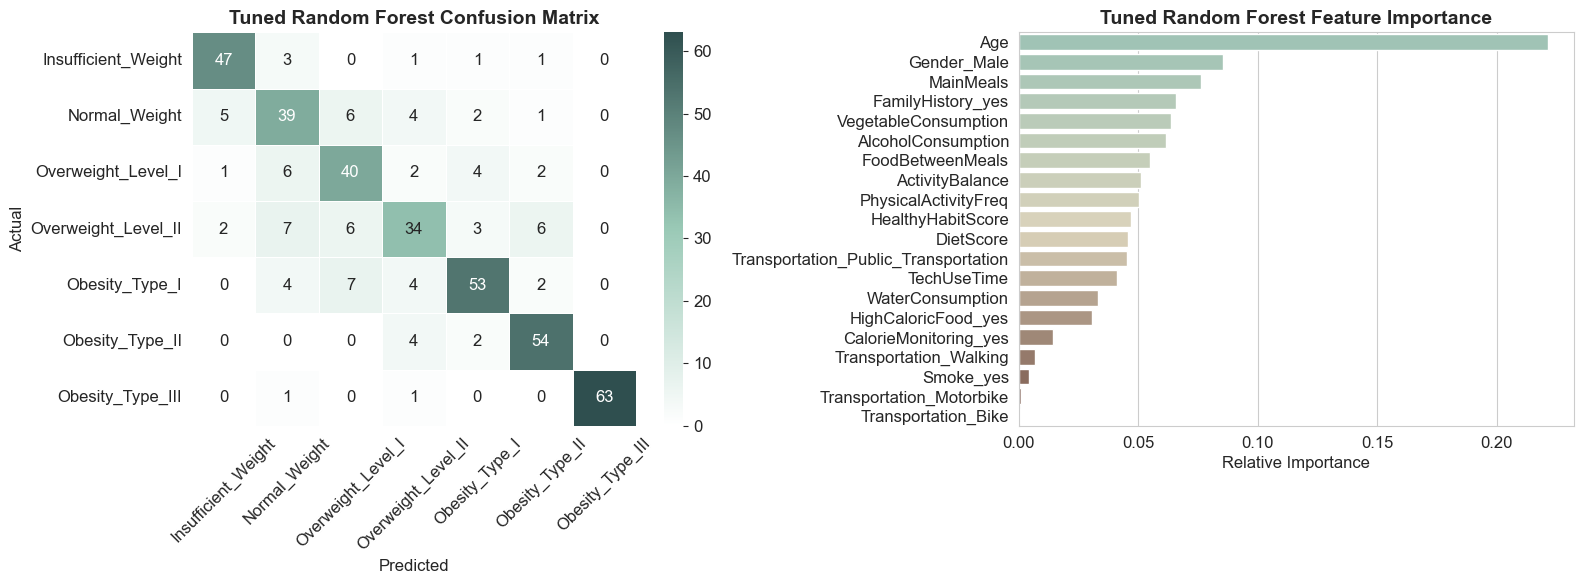

In [147]:
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_base = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rf_base, param_distributions=param_dist, 
                               n_iter=50, cv=3, verbose=1, random_state=42, n_jobs=-1, scoring='f1_macro')

print("Tuning Random Forest... This may take 1-2 minutes.")
rf_random.fit(X_train_processed, y_train)

best_rf_model = rf_random.best_estimator_
print(f"Best Parameters found: {rf_random.best_params_}")

best_rf_model, best_rf_pred = evaluate_and_visualize(best_rf_model, X_train_processed, y_train, X_test_processed, y_test, "Tuned Random Forest")

## 5.7 Champion Model Selection

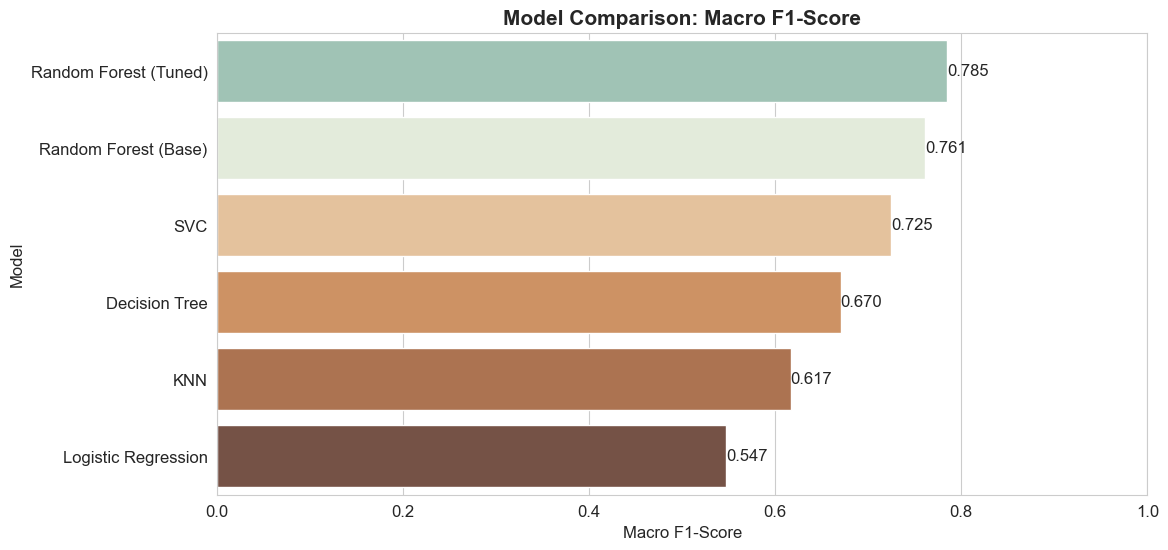

In [148]:
results = {
    'Logistic Regression': f1_score(y_test, lr_pred, average='macro'),
    'Decision Tree': f1_score(y_test, dt_pred, average='macro'),
    'Random Forest (Base)': f1_score(y_test, rf_pred, average='macro'),
    'SVC': f1_score(y_test, svc_pred, average='macro'),
    'KNN': f1_score(y_test, knn_pred, average='macro'),
    'Random Forest (Tuned)': f1_score(y_test, best_rf_pred, average='macro')
}

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Macro F1-Score']).sort_values(by='Macro F1-Score', ascending=False)

plt.figure(figsize=(12, 6))
dynamic_palette = sns.blend_palette(custom_colors, n_colors=6)
sns.barplot(x='Macro F1-Score', y='Model', data=results_df, palette=dynamic_palette)
plt.title('Model Comparison: Macro F1-Score', fontsize=15)
plt.xlim(0, 1.0)
for index, value in enumerate(results_df['Macro F1-Score']):
    plt.text(value, index, f'{value:.3f}', va='center')
plt.show()

# 6. Evaluation & Interpretation


## 6.1 Did Feature Engineering Help?

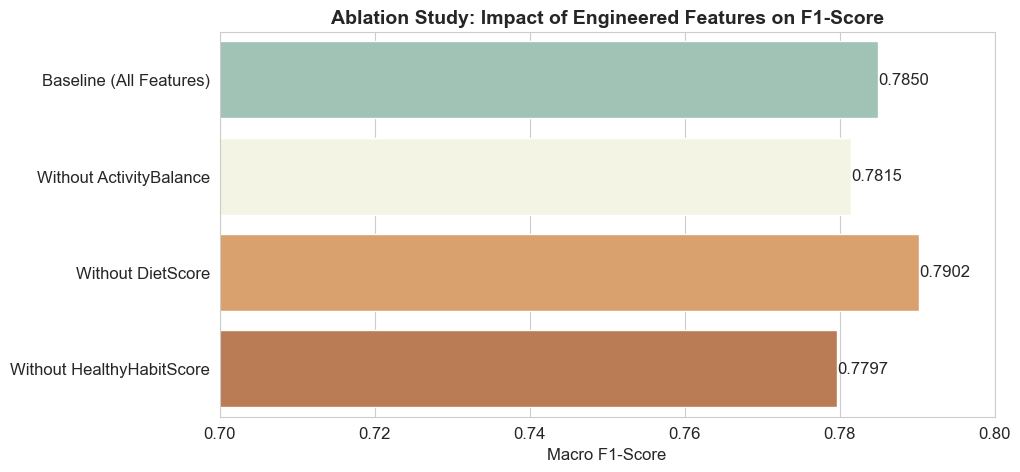

In [149]:
def run_ablation_study(model, X_train_full, y_train, X_test_full, y_test, feature_names):
    model.fit(X_train_full, y_train)
    baseline_pred = model.predict(X_test_full)
    baseline_f1 = f1_score(y_test, baseline_pred, average='macro')
    
    results = {'Baseline (All Features)': baseline_f1}
    
    engineered_feats = {
        'ActivityBalance': 6, 
        'DietScore': 7, 
        'HealthyHabitScore': 8
    }
    
    for feat_name, idx in engineered_feats.items():
        X_tr_drop = np.delete(X_train_full, idx, axis=1)
        X_te_drop = np.delete(X_test_full, idx, axis=1)
        
        model.fit(X_tr_drop, y_train)
        pred = model.predict(X_te_drop)
        score = f1_score(y_test, pred, average='macro')
        
        results[f'Without {feat_name}'] = score
        
    return results

ablation_results = run_ablation_study(best_rf_model, X_train_processed, y_train, X_test_processed, y_test, feature_names)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(ablation_results.values()), y=list(ablation_results.keys()), palette=custom_colors)
plt.title('Ablation Study: Impact of Engineered Features on F1-Score', fontsize=14)
plt.xlabel('Macro F1-Score')
plt.xlim(0.70, 0.80)
for i, v in enumerate(ablation_results.values()):
    plt.text(v, i, f'{v:.4f}', va='center')
plt.show()

In [150]:
# --- FIX: Retrain model on ALL features to fix the 19 vs 20 error ---
print("Restoring Champion Model to full capacity...")
best_rf_model.fit(X_train_processed, y_train)
print("Model restored. Ready for prediction.")

Restoring Champion Model to full capacity...
Model restored. Ready for prediction.


# Real Time Survey

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown
import pandas as pd

best_rf_model.fit(X_train_processed, y_train)

def get_clean_names(preprocessor):
    try:
        raw = preprocessor.get_feature_names_out()
    except:
        raw = preprocessor.get_feature_names()
    return [n.split("__")[1] if "__" in n else n for n in raw]

def engineer_features_inference(data):
    df_eng = data.copy()
    df_eng['ActivityBalance'] = df_eng['PhysicalActivityFreq'] - df_eng['TechUseTime']
    caec_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
    favc_map = {'no': 0, 'yes': 1}
    df_eng['DietScore'] = (df_eng['VegetableConsumption'] + df_eng['WaterConsumption'] - 
                           df_eng['FoodBetweenMeals'].map(caec_map) - df_eng['HighCaloricFood'].map(favc_map))
    calc_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
    alcohol_score = df_eng['AlcoholConsumption'].map(calc_map)
    smoke_score = df_eng['Smoke'].apply(lambda x: 1 if x == 'yes' else 0)
    df_eng['HealthyHabitScore'] = (df_eng['VegetableConsumption'] + df_eng['WaterConsumption']) - (alcohol_score + smoke_score)
    return df_eng

style = {'description_width': 'initial'}
layout_full = widgets.Layout(width='98%')
layout_half = widgets.Layout(width='48%')

print("🇰🇿 AI Health Advisor: Steppe Edition 🦅")

w_head_demo = widgets.HTML("<h3>👤 Demographics</h3>")
w_age = widgets.IntSlider(value=21, min=14, max=61, description='Age:', style=style, layout=layout_full)
w_gender = widgets.Dropdown(options=['Male', 'Female'], description='Gender:', style=style, layout=layout_half)
w_family = widgets.Dropdown(options=['yes', 'no'], value='no', description='Family History:', style=style, layout=layout_half)

w_head_diet = widgets.HTML("<h3>🍖 Eating Habits</h3>")
w_favc = widgets.Dropdown(options=['yes', 'no'], value='yes', description='High Caloric Food?', style=style, layout=layout_half)
w_veggies = widgets.IntSlider(value=2, min=1, max=3, description='Veggies (1-3):', style=style, layout=layout_full)
w_meals = widgets.IntSlider(value=3, min=1, max=4, description='Main Meals:', style=style, layout=layout_full)
w_caec = widgets.Dropdown(options=['no', 'Sometimes', 'Frequently', 'Always'], value='Sometimes', description='Snacking:', style=style, layout=layout_half)
w_water = widgets.IntSlider(value=2, min=1, max=3, description='Water (1-3):', style=style, layout=layout_full)
w_scc = widgets.Dropdown(options=['yes', 'no'], value='no', description='Monitor Calories?', style=style, layout=layout_half)
w_alcohol = widgets.Dropdown(options=['no', 'Sometimes', 'Frequently', 'Always'], value='Sometimes', description='Alcohol:', style=style, layout=layout_half)

w_head_life = widgets.HTML("<h3>🐎 Lifestyle</h3>")
w_smoke = widgets.Dropdown(options=['yes', 'no'], value='no', description='Smoke?', style=style, layout=layout_half)
w_faf = widgets.FloatSlider(value=1.0, min=0.0, max=3.0, step=0.5, description='Phys. Activity:', style=style, layout=layout_full)
w_tue = widgets.FloatSlider(value=1.0, min=0.0, max=2.0, step=0.5, description='Tech Use:', style=style, layout=layout_full)
w_trans = widgets.Dropdown(options=['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike'], value='Public_Transportation', description='Transport:', style=style, layout=layout_full)

btn_predict = widgets.Button(description="🔮 Predict (Kazakh Style)", button_style='success', layout=widgets.Layout(width='60%', height='50px'))
out = widgets.Output()

def on_click_predict(b):
    with out:
        clear_output()
        print("--- ⚙️ PROCESSING YOUR DATA ---")
        
        user_input = pd.DataFrame([{
            'Gender': w_gender.value, 'Age': w_age.value, 'FamilyHistory': w_family.value,
            'HighCaloricFood': w_favc.value, 'VegetableConsumption': w_veggies.value,
            'MainMeals': w_meals.value, 'FoodBetweenMeals': w_caec.value, 'Smoke': w_smoke.value,
            'WaterConsumption': w_water.value, 'CalorieMonitoring': w_scc.value,
            'PhysicalActivityFreq': w_faf.value, 'TechUseTime': w_tue.value,
            'AlcoholConsumption': w_alcohol.value, 'Transportation': w_trans.value
        }])
        
        try:
            user_eng = engineer_features_inference(user_input)
            
            user_processed_array = preprocessor.transform(user_eng)

            feature_names = get_clean_names(preprocessor)
            user_model_input = pd.DataFrame(user_processed_array, columns=feature_names)
            
            print("\n1. FEATURE ENGINEERING SCORES:")
            print(f"   DietScore:       {user_eng['DietScore'].values[0]}")
            print(f"   ActivityBalance: {user_eng['ActivityBalance'].values[0]}")
            
            print("\n2. MODEL INPUT VECTOR (First 5 cols):")
            print(user_model_input.iloc[:, :5].to_string(index=False))
            
            pred_code = best_rf_model.predict(user_processed_array)[0]
            pred_probs = best_rf_model.predict_proba(user_processed_array)[0]
            confidence = max(pred_probs)
            
            reverse_mapping = {v: k for k, v in target_mapping.items()}
            pred_label = reverse_mapping[pred_code]
            

            img_besh = "https://mf.b37mrtl.ru/rbthmedia/images/2022.10/original/63455abf57050e1389043a1d.jpg"
            img_horse = "https://avatars.mds.yandex.net/i?id=57333a8e403fe4e842c8fcd7ae8c6e2095d08c1f-8318113-images-thumbs&n=13"
            img_qymyz = "https://en.orda.kz/uploads/posts/2025-07/sizes/1440x810/1752641453__gluster_2025_5_21_b5fd203839d6fad5a3f81412c38ad4ac_1280x720.webp"
            img_medeu = "https://www.kt.kz/neofiles/serve-image/63abf0cad6a86c1d4960a818"
            
            display(Markdown(f"## 🏁 Result: **{pred_label.replace('_', ' ')}**"))
            print(f"(Confidence: {confidence:.2%})")
            print("-" * 40)
            
            if pred_label == 'Insufficient_Weight':
                print("🥣 ADVICE: You are too thin, my friend!")
                print("👉 DIET: Go visit your Grandma instantly. Eat full plate of Beshbarmak with fatty Kazy.")
                display(widgets.HTML(f'<img src="{img_besh}" width="400" style="border-radius:10px;">'))
                
            elif pred_label == 'Normal_Weight':
                print("🦅 ADVICE: Naagyz Batyr (Real Warrior)!")
                print("👉 STATUS: Perfect balance for the Steppe life. Jaraysyn!")
                display(widgets.HTML(f'<img src="{img_horse}" width="400" style="border-radius:10px;">'))
                
            elif 'Overweight' in pred_label:
                print("🐎 ADVICE: Too much tea and sweets!")
                print("👉 DIET: Drink Qymyz (it helps digestion) instead of Coke.")
                print("👉 ACTIVITY: Park the car. Walk to the Bazar or ride a horse for 30 mins a day.")
                display(widgets.HTML(f'<img src="{img_qymyz}" width="400" style="border-radius:10px;">'))
                
            elif 'Obesity' in pred_label:
                print("🏔️ ADVICE: The horse is tired carrying you!")
                print("👉 ACTIVITY: You must climb Medeu on foot... three times a week!")
                print("👉 DIET: No Beshbarmak after 6 PM. Stick to Ayran and Qurt.")
                display(widgets.HTML(f'<img src="{img_medeu}" width="400" style="border-radius:10px;">'))
            
            print("-" * 40)
            
        except Exception as e:
            print(f"Error: {e}")

btn_predict.on_click(on_click_predict)

ui = widgets.VBox([
    widgets.HBox([
        widgets.VBox([w_head_demo, w_age, w_gender, w_family, w_head_life, w_smoke, w_faf, w_tue, w_trans]),
        widgets.VBox([w_head_diet, w_favc, w_veggies, w_meals, w_caec, w_water, w_scc, w_alcohol])
    ]),
    widgets.VBox([widgets.HTML("<br>"), btn_predict, out], layout=widgets.Layout(align_items='center'))
])

display(ui)

🇰🇿 AI Health Advisor: Steppe Edition 🦅


# Body Mass Index Table

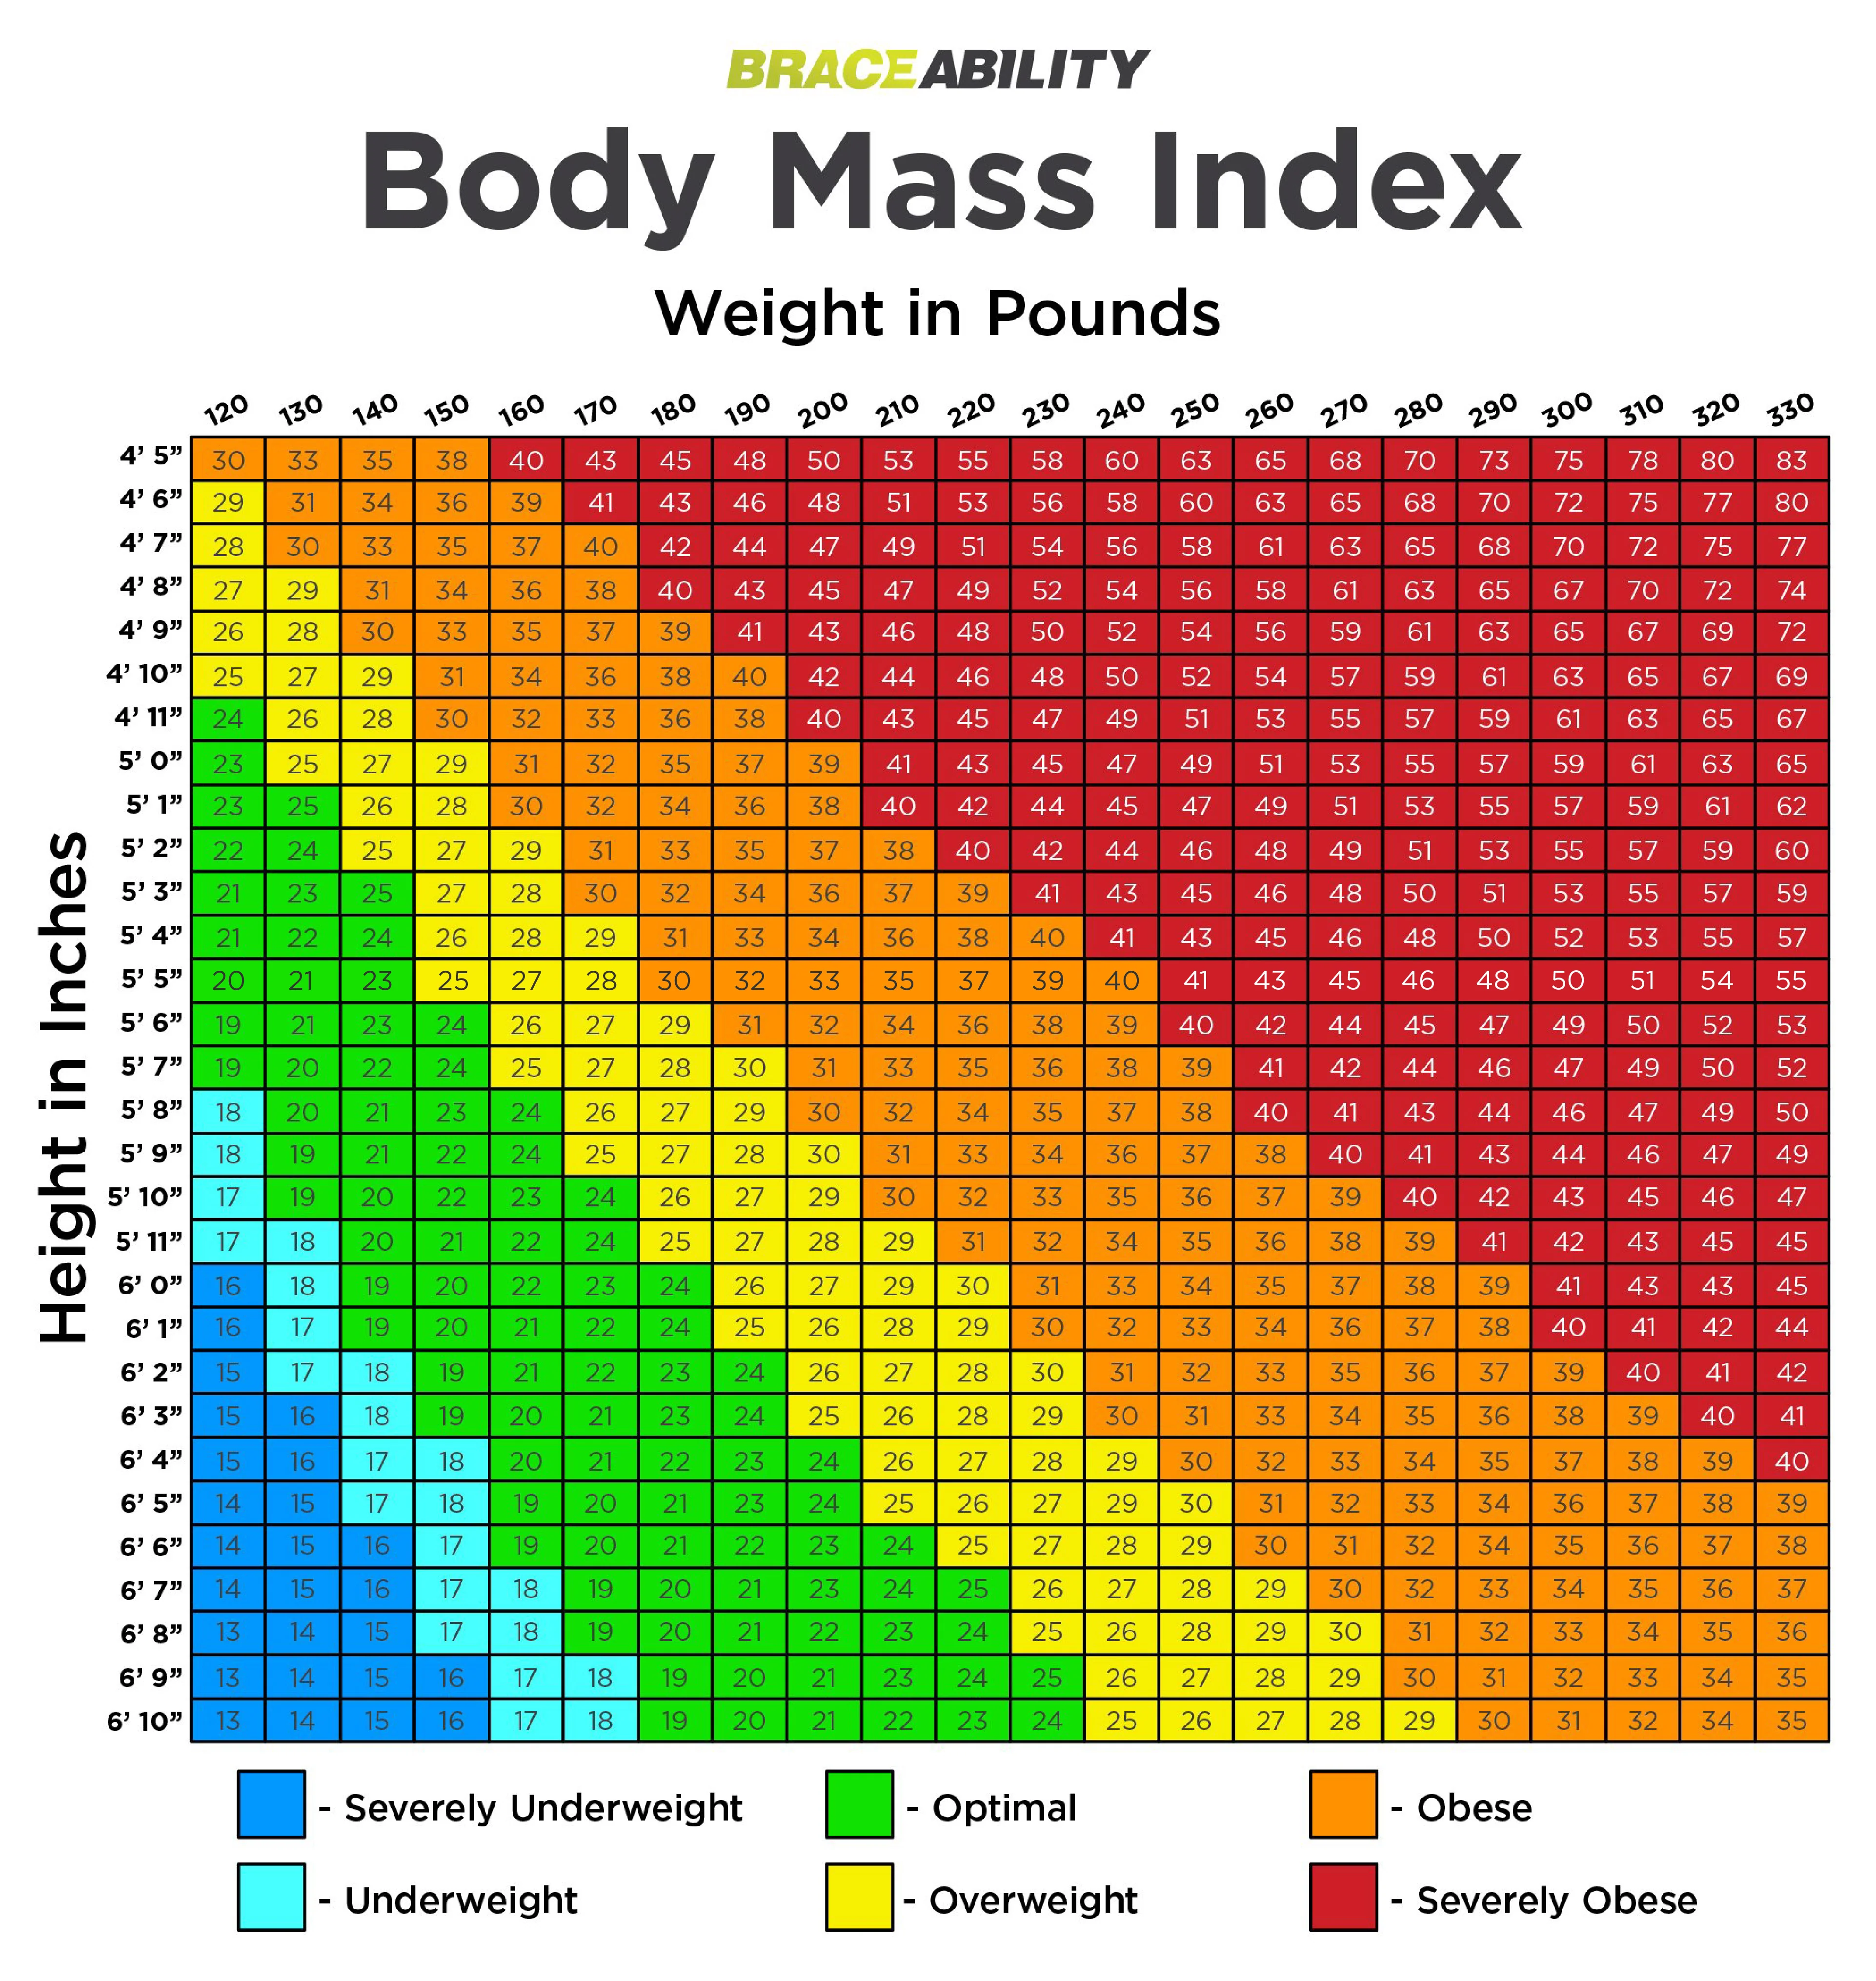

In [152]:
display(Image(filename='bmi_table.png', width=800))

# 7. Conclusion & Recommendations

### 7.1 Model Performance
The **Tuned Random Forest** achieved a **Macro F1-Score of 0.785**. By strictly excluding Weight and Height to prevent data leakage, the study validates the feasibility of predicting obesity risk using only demographic and lifestyle attributes for early screening purposes.

### 7.2 Key Findings
*   **Feature Engineering:** The Ablation Study confirms that **`ActivityBalance`** and **`HealthyHabitScore`** enhance predictive power. However, the composite **`DietScore`** reduced performance, suggesting that raw dietary features (individual inputs) carry stronger signals than linear combinations.
*   **Primary Drivers:** **`Age`** and **`Gender`** emerged as the dominant predictors, followed by **`FamilyHistory`**. This indicates that biological and environmental factors establish the baseline risk, while habits adjust the specific outcome.
*   **Error Analysis:** The model demonstrates high precision in detecting extreme classes (e.g., *Obesity Type III*), but accuracy diminishes between adjacent categories (e.g., *Overweight Level I* vs. *II*) due to significant behavioral overlap.

### 7.3 Limitations
1.  **Data Leakage Constraint:** By removing Weight/Height, we made the problem harder but more realistic. However, this means we cannot catch "borderline" cases that rely strictly on BMI cutoffs.
2.  **Self-Reported Data:** Features like "High Caloric Food" are subjective. A person might under-report bad habits, introducing noise that no model can fully fix.
3.  **Class Overlap:** The Confusion Matrix shows persistent errors between `Overweight_Level_I` and `Overweight_Level_II`. These classes are likely physiologically too similar to distinguish based purely on behavioral data.

### 7.4 Future Improvements
1.  **Quantitative Data:** Replace categorical frequency (e.g., "Sometimes") with exact calorie counts and activity minutes.
2.  **Advanced Boosting:** Implement **XGBoost** or **LightGBM**, which often handle class imbalance and subtle feature interactions better than Random Forest.
3.  **Longitudinal Data:** Collecting data over time would allow us to predict *weight gain trends* rather than just static obesity levels.